# 导包

In [1169]:
%matplotlib notebook
import time
import scipy
import qutip as qt
from qulab.sugar import connect
from qulab.job import Job
from qulab.storage.utils import save
import matplotlib.pyplot as plt, seaborn as sns
import numpy as np, sympy as sy, visa
from collections import namedtuple, deque, defaultdict, OrderedDict, Counter
from scipy.optimize import curve_fit, least_squares as ls
import time, asyncio, sys, imp, pandas as pd
from tqdm import tqdm_notebook as tqdm
# from easydl import clear_output
from sklearn.cluster import KMeans
from qulab.math.qst import transformList, acquireVFromData, vToRho
from qulab.math import opt
from qulab.yhs import ezQ,ezQ4
from qulab.yhs import optimize, measureroutine_population, computewave_wave, imatrix, waveform_new, dataTools, qGate_basewave
import gc
from qulab.tomo import qst, tomography
from qulab.yhs import measureroutine_HS
mrs = imp.reload(measureroutine_HS)
opt = imp.reload(opt)
op = imp.reload(optimize)
mrw = imp.reload(measureroutine_population)
cww = imp.reload(computewave_wave)
mx = imp.reload(imatrix)
wn = imp.reload(waveform_new)
dtl = imp.reload(dataTools)
qgw = imp.reload(qGate_basewave)
ezQ_inst = imp.reload(ezQ)
ezQ_inst4 = imp.reload(ezQ4)

In [95]:
await psg_ex1.getValue('Frequency')

4722841466.785

In [100]:
await dc01.dc_query()

dc:[DC1] query volt value:[0.4469999761581187].


0.4469999761581187

INFO:qulab.dht.protocol:finding neighbors of 1417600491697151643588971581752746510190375157465 in local table
INFO:qulab.dht.protocol:finding neighbors of 546384816236211645690379443203673294636321354962 in local table
INFO:qulab.dht.protocol:finding neighbors of 546384816236211645690379443203673294636321354962 in local table
INFO:qulab.dht.protocol:finding neighbors of 1067776801758972474209643641543276715798527885339 in local table
INFO:qulab.dht.protocol:finding neighbors of 1067776801758972474209643641543276715798527885339 in local table


In [102]:
await psg_ex3.setValue('Frequency',4.98e9)

INFO:qulab.dht.protocol:finding neighbors of 1417600491697151643588971581752746510190375157465 in local table
INFO:qulab.dht.protocol:finding neighbors of 546384816236211645690379443203673294636321354962 in local table
INFO:qulab.dht.protocol:finding neighbors of 1067776801758972474209643641543276715798527885339 in local table
INFO:qulab.dht.crawling:creating spider with peers: [[965284137851562069902106721481028785806932498285, '10.0.200.182', 58529], [1067776801758972474209643641543276715798527885339, '10.0.200.182', 53700], [1417600491697151643588971581752746510190375157465, '10.0.200.182', 56097], [309064898816187390240202570210084526907012357374, '10.0.200.182', 52625], [83952649482989678037056908595965420013451457765, '10.0.200.182', 56222], [649080297744205108743306444131829959974205496977, '10.0.200.182', 60097], [694931976776429100391351222657914630954962137837, '10.0.200.182', 8987], [546384816236211645690379443203673294636321354962, '10.0.200.182', 56178], [52710387210115427

In [2]:
# rm = visa.ResourceManager()
# INS = rm.open_resource('TCPIP::10.0.200.101')
# x = INS.query('syst:err?')
# x

In [306]:
dc01 = ezQ_inst.DC('DC1','10.0.200.168',int(5000),1)
dc02 = ezQ_inst.DC('DC1','10.0.200.168',int(5000),2)
dc03 = ezQ_inst.DC('DC1','10.0.200.168',int(5000),3)
dc04 = ezQ_inst.DC('DC1','10.0.200.168',int(5000),4)
dc05 = ezQ_inst.DC('DC1','10.0.200.169',int(5000),1)
dc06 = ezQ_inst.DC('DC1','10.0.200.169',int(5000),2)
dc07 = ezQ_inst.DC('DC1','10.0.200.169',int(5000),3)
dc08 = ezQ_inst.DC('DC1','10.0.200.169',int(5000),4)
dc09 = ezQ_inst4.DC('DC1','10.0.200.72',int(5000),1)
dc10 = ezQ_inst4.DC('DC1','10.0.200.72',int(5000),2)
dc11 = ezQ_inst4.DC('DC1','10.0.200.72',int(5000),3)

# # ###微波源
psg_lo = await connect('PSG101')
psg_pump = await connect('PSG28')
psg_trans= await connect('PSG106')

psg_ex1 = await connect('PSG230')
psg_ex2 = await connect('PSG27')
psg_ex3 = await connect('PSG25')

# ###国盾
awg1 = ezQ_inst.DA('QF10K4N0018', '10.0.200.161')#读出
awg2 = ezQ_inst4.DA('QF10K4N0050', '10.0.200.68')#读出

awgEx1 = ezQ_inst.DA('QF10K4N0063', '10.0.200.162')#XYA,XYB(C_up)
awgEx2 = ezQ_inst.DA('QF10K4N0038', '10.0.200.163')#XYA,XYB(C_down)
awgEx3 = ezQ_inst.DA('QF10K4N0069', '10.0.200.164')#XYA,XYB(D_up)
awgEx4 = ezQ_inst.DA('QF10K4N0059', '10.0.200.165')#XYA,XYB(D_down)
awgEx5 = ezQ_inst.DA('QF10K4N0075', '10.0.200.70')#XYA,XYB
awgEx6 = ezQ_inst.DA('QF10K4N0064', '10.0.200.69')#XYC,XYD

awgZ1 = ezQ_inst.DA('QF10K4N0001', '10.0.200.166')#Z_pulse
awgZ2 = ezQ_inst.DA('QF10K4N0061', '10.0.200.167')#Z_pulse
awgZ3 = ezQ_inst.DA('QF10K4N0034', '10.0.200.71')#Z_pulse

ats = ezQ_inst.AD('QE10K4N0014', '00-00-00-00-00-5E',"B0-7B-25-0C-52-6D")
ats2 = ezQ_inst4.AD('QE10K4N0016', '00-00-00-00-00-60', "B0-7B-25-0C-52-6D")

INFO:qulab.dht.network:Looking up key PSG101
INFO:qulab.dht.network:Looking up key PSG28
INFO:qulab.dht.network:Looking up key PSG106
INFO:qulab.dht.network:Looking up key PSG230
INFO:qulab.dht.network:Looking up key PSG27
INFO:qulab.dht.network:Looking up key PSG25


In [307]:
await psg_lo.setValue('Output','OFF')

INFO:qulab.dht.network:Looking up key PSG101


In [3]:
await psg_pump.query('*IDN?')

'ANRITSU,MG3692C,185105,3.62\r\n'

# 微波源触发输出

In [162]:
await measure.psg['psg_trans'].setValue('Moutput','OFF')

In [143]:
await measure.psg['psg_trans'].setValue('Mform','EXT')

In [164]:
await measure.psg['psg_trans'].getValue('Mform')

'EXT'

In [163]:
await measure.psg['psg_trans'].getValue('Moutput')

'0'

In [152]:
pulse = await cww.zWave(volt=0.4,during=3000e-9,shift=0e-9,offset=0,timing={'z>xy':0,'read>xy':0},zCali=None,readvolt=0)
await cww.writeWave(measure,awgZ3,[3],pulse)

<IPython.core.display.Javascript object>


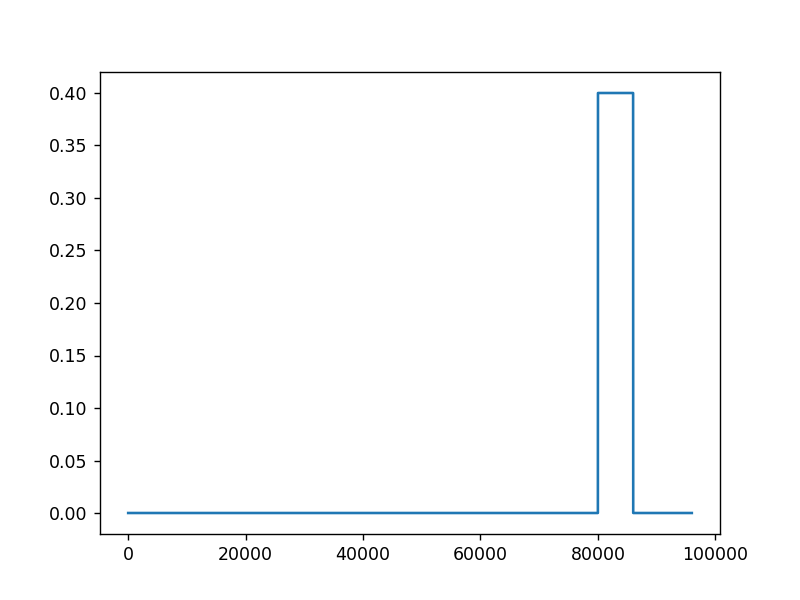

In [153]:
plt.figure()
plt.plot(pulse[0,:])

# 指定仪器

In [308]:
psg = {'psg_lo':psg_lo,'psg_ex1':psg_ex1,'psg_ex2':psg_ex2,'psg_ex3':psg_ex3,'psg_pump':psg_pump,'psg_trans':psg_trans,}
# psg = {}
ats = ats
dc = {'q1':dc01,'q2':dc02,'q3':dc03,'q4':dc04,'q5':dc05,\
      'q6':dc06,'q7':dc07,'q8':dc08,'q9':dc09,'q10':dc10,'jpa':dc11}
#awg = awg132
attinst = {}
awg_list = {'awg1':awg1,'awg2': awg2,'awgread':awg1,'awgread2':awg2,'awgEx1':awgEx1,'awgEx2':awgEx2,'awgEx3':awgEx3,'awgEx4':awgEx4,'awgEx5':awgEx5,'awgEx6':awgEx6,\
           'awgZ1':awgZ1,'awgZ2':awgZ2,'awgZ3':awgZ3}

# qubit工作点

In [6]:
freqall = np.array([6.545, 6.564, 6.588, 6.608, 6.63, 6.649, 6.642, 6.689, 6.71, 6.73])*1e9
# freqall = np.array([6.545, 6.564, 6.588, 6.608, 6.63, 6.649, 6.642, 6.689])*1e9
# freqall = freqall[::-1]
f_cavity = {'q%d'%(i):j for i, j in enumerate(freqall,start=1)}

In [101]:
measure.delta

array([71066666.66666603, 88933333.33333302])

INFO:qulab.dht.protocol:finding neighbors of 309064898816187390240202570210084526907012357374 in local table


In [7]:
jpa = mrw.qubit(q_name='jpa',inst={'dc':'dc03','pump':'psg_pump'},bias=-4.575,f_ex=13.362e9,power_ex=8.92) #power=-2.1

## 保存qubit

In [1407]:
tags = 'q1-10-qramsey'
filepath = cww.saveQubitstate(measure,tags)
print(filepath)

D:\skzhao\file_name\wave\2021\0719\q1-10-qramsey_20210719225335.npz


## 提取qubit

In [501]:
# f = r'D:\skzhao\file_name\wave\2021\0517\QubitState_20210517102249.npz'    #otoc
# f = r'D:\skzhao\file_name\wave\2021\0519\odd_even_ex_20210519083655.npz'
# f = r'D:\skzhao\file_name\wave\2021\0525\odd_even_ex_20210525235601.npz'
# f = r'D:\skzhao\file_name\wave\2021\0609\q1-10-otoc_20210609083813.npz'
# f = r'D:\skzhao\file_name\wave\2021\0606\q5-q6-sqrtiswap_20210606192046.npz'   #q1直流偏开
f = -1
try:
    measure = measure
except NameError:
    measure = None
f, qubits_lst = cww.loadQubitstate(f=f,measure=measure)
for i in qubits_lst:
    globals()[i.q_name] = i
print(f)

D:\skzhao\file_name\wave\2021\0718\q1-10-otoc_20210718140831.npz


# 测量类

In [9]:
measure = mrw.common(f_cavity,ats,dc,psg,awg_list,attinst,jpa,[q1,q2,q3,q4,q5,q6,q7,q8,q9,q10])

## 注意检查

In [410]:
qubitlist = [q1,q2,q3,q4,q5,q6,q7,q8,q9,q10]
measure.qubits= {i.q_name:i for i in qubitlist}

In [309]:
measure.dc=dc
measure.psg=psg
measure.ats2=ats2
measure.awg_list = awg_list

In [411]:
for i in measure.qubits:
    if globals()[i] != measure.qubits[i]:
        print(i)
        raise 'different qubit'

# 链接并初始化仪器

In [1454]:
for i in measure.awg:
    if i == 'awgread' or i == 'awg_trig' or i == 'awgread2':
        continue
    await measure.awg[i].da_connect_device()
await measure.ats.ad_connect_device()
await measure.ats2.ad_connect_device()

da board:[QF10K4N0018] connect success .
da board:[QF10K4N0050] connect success .
da board:[QF10K4N0063] connect success .
da board:[QF10K4N0038] connect success .
da board:[QF10K4N0069] connect success .
da board:[QF10K4N0059] connect success .
da board:[QF10K4N0075] connect success .
da board:[QF10K4N0064] connect success .
da board:[QF10K4N0001] connect success .
da board:[QF10K4N0061] connect success .
da board:[QF10K4N0034] connect success .
0000


['频率(MHz)：79.99998331069946', '频率(MHz)：132.00002908706665', '频率(MHz)：143.0666446685791', '频率(MHz)：0.0', '频率(MHz)：0.0', '频率(MHz)：0.0', '频率(MHz)：0.0', '频率(MHz)：0.0']
INFO:device driver:['频率(MHz)：79.99998331069946', '频率(MHz)：132.00002908706665', '频率(MHz)：143.0666446685791', '频率(MHz)：0.0', '频率(MHz)：0.0', '频率(MHz)：0.0', '频率(MHz)：0.0', '频率(MHz)：0.0']
['解模长度：2000', '解模长度：2000', '解模长度：2000', '解模长度：0', '解模长度：0', '解模长度：0', '解模长度：0', '解模长度：0']
INFO:device driver:['解模长度：2000', '解模长度：2000', '解模长度：2000', '解模长度：0', '解模长度：0', '解模长度：0', '解模长度：0', '解模长度：0']
['解模窗口：2000', '解模窗口：2000', '解模窗口：2000', '解模窗口：0', '解模窗口：0', '解模窗口：0', '解模窗口：0', '解模窗口：0']
INFO:device driver:['解模窗口：2000', '解模窗口：2000', '解模窗口：2000', '解模窗口：0', '解模窗口：0', '解模窗口：0', '解模窗口：0', '解模窗口：0']
['解模起始：8', '解模起始：8', '解模起始：8', '解模起始：0', '解模起始：0', '解模起始：0', '解模起始：0', '解模起始：0']
INFO:device driver:['解模起始：8', '解模起始：8', '解模起始：8', '解模起始：0', '解模起始：0', '解模起始：0', '解模起始：0', '解模起始：0']
['态判断参数A：0', '态判断参数A：0', '态判断参数A：0', '态判断参数A：0', '态判断参数A：0', '态判断参数A：0', '

0000


['频率(MHz)：79.99998331069946', '频率(MHz)：88.90002965927124', '频率(MHz)：0.0', '频率(MHz)：0.0', '频率(MHz)：0.0', '频率(MHz)：0.0', '频率(MHz)：0.0', '频率(MHz)：0.0']
INFO:device driver:['频率(MHz)：79.99998331069946', '频率(MHz)：88.90002965927124', '频率(MHz)：0.0', '频率(MHz)：0.0', '频率(MHz)：0.0', '频率(MHz)：0.0', '频率(MHz)：0.0', '频率(MHz)：0.0']
['解模长度：2000', '解模长度：2000', '解模长度：0', '解模长度：0', '解模长度：0', '解模长度：0', '解模长度：0', '解模长度：0']
INFO:device driver:['解模长度：2000', '解模长度：2000', '解模长度：0', '解模长度：0', '解模长度：0', '解模长度：0', '解模长度：0', '解模长度：0']
['解模窗口：2000', '解模窗口：2000', '解模窗口：0', '解模窗口：0', '解模窗口：0', '解模窗口：0', '解模窗口：0', '解模窗口：0']
INFO:device driver:['解模窗口：2000', '解模窗口：2000', '解模窗口：0', '解模窗口：0', '解模窗口：0', '解模窗口：0', '解模窗口：0', '解模窗口：0']
['解模起始：8', '解模起始：8', '解模起始：0', '解模起始：0', '解模起始：0', '解模起始：0', '解模起始：0', '解模起始：0']
INFO:device driver:['解模起始：8', '解模起始：8', '解模起始：0', '解模起始：0', '解模起始：0', '解模起始：0', '解模起始：0', '解模起始：0']
['态判断参数A：0', '态判断参数A：0', '态判断参数A：0', '态判断参数A：0', '态判断参数A：0', '态判断参数A：0', '态判断参数A：0', '态判断参数A：0']
INFO:device driver:

0

In [1455]:
repeats = 500
trig_interval = 260e-6
ad_trig_delay = 43348e-9 +24e-9#15340e-9
depth = 2000
delta = np.array([80e6])
measure.ad_trig_delay = ad_trig_delay

In [1457]:
#初始化
for i in measure.awg:
    await measure.awg[i].da_init_device(trig_interval)
    await measure.awg[i].da_trigg(repeats)
await measure.ats.ad_init_device()
await measure.ats2.ad_init_device()
#采集数据出发时间延迟
await awg1.da_set_trig_delay(ad_trig_delay)#AWG主板
await awg2.da_set_trig_delay(ad_trig_delay)#AWG主板
# await awg2.da_set_trig_delay(ad_trig_delay)#AWG主板
# measure.ats.set_ad(depth, repeats, mode=1)## 
# measure.ats.ad_data_clear()
# measure.ats.set_ad_freq(delta, depth, window_start=8)

# 信号检查

In [1458]:
measure.readamp = [0.5]*10
measure.ringup = [100,100,100,100,100,100,100,100,100,200][:]
measure.ringupamp = [0.5]*10
await cww.modulation_read(measure,delta,readlen=2000,repeats=500,ATS=True)
await cww.modulation_read(measure,delta,readlen=2000,repeats=500,ATS=False)

# 时域信号

In [1459]:
%matplotlib notebook
I, Q = 0, 0
await psg['psg_lo'].setValue('Output','ON')
await psg['psg_lo'].setValue('Power',23)
await psg['psg_lo'].setValue('Frequency',6e9)

for i in range(1):
#     chA, chB = await measure.ats.getTraces()
    chA, chB = await measure.ats2.getTraces()
    I += chA
    Q += chB
plt.figure(figsize=(7,5))
plt.plot(np.arange(len(I)), I,label='origin signal I')
plt.plot(np.arange(len(Q)), Q,label='origin signal Q',alpha=0.6)
#plt.plot(np.arange(len(Q)), np.sqrt(I**2+Q**2),'.',label='envelop')
plt.legend(loc="lower left")
plt.show()

No status data back........................
INFO:device driver:No status data back........................
['频率(MHz)：79.99998331069946', '频率(MHz)：88.90002965927124', '频率(MHz)：0.0', '频率(MHz)：0.0', '频率(MHz)：0.0', '频率(MHz)：0.0', '频率(MHz)：0.0', '频率(MHz)：0.0']
INFO:device driver:['频率(MHz)：79.99998331069946', '频率(MHz)：88.90002965927124', '频率(MHz)：0.0', '频率(MHz)：0.0', '频率(MHz)：0.0', '频率(MHz)：0.0', '频率(MHz)：0.0', '频率(MHz)：0.0']
['解模长度：2000', '解模长度：2000', '解模长度：0', '解模长度：0', '解模长度：0', '解模长度：0', '解模长度：0', '解模长度：0']
INFO:device driver:['解模长度：2000', '解模长度：2000', '解模长度：0', '解模长度：0', '解模长度：0', '解模长度：0', '解模长度：0', '解模长度：0']
['解模窗口：2000', '解模窗口：2000', '解模窗口：0', '解模窗口：0', '解模窗口：0', '解模窗口：0', '解模窗口：0', '解模窗口：0']
INFO:device driver:['解模窗口：2000', '解模窗口：2000', '解模窗口：0', '解模窗口：0', '解模窗口：0', '解模窗口：0', '解模窗口：0', '解模窗口：0']
['解模起始：8', '解模起始：8', '解模起始：0', '解模起始：0', '解模起始：0', '解模起始：0', '解模起始：0', '解模起始：0']
INFO:device driver:['解模起始：8', '解模起始：8', '解模起始：0', '解模起始：0', '解模起始：0', '解模起始：0', '解模起始：0', '解模起始：0']
['态判断参数A：

TypeError: 'int' object is not subscriptable

INFO:qulab.dht.protocol:finding neighbors of 694931976776429100391351222657914630954962137837 in local table


[2.80e+07 1.32e+08]


<IPython.core.display.Javascript object>


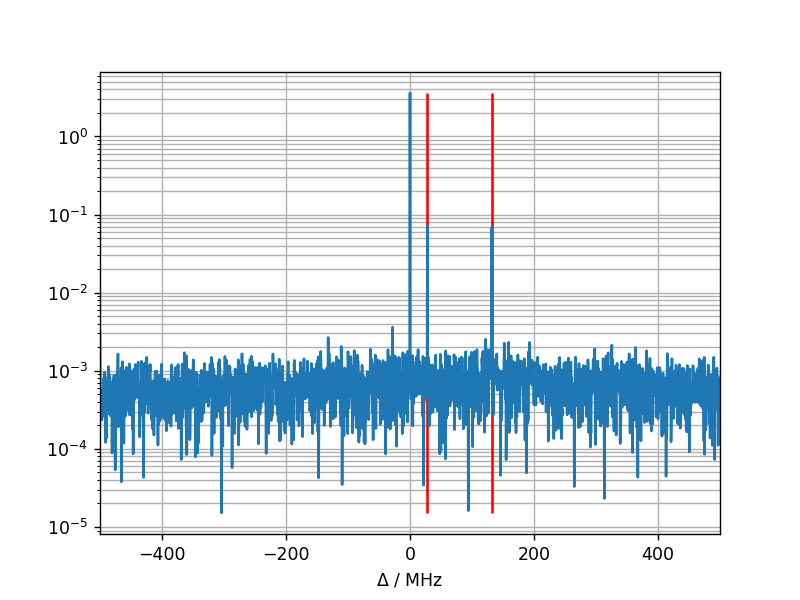

In [1445]:
x = np.fft.fftshift(np.fft.fftfreq(len(I)))*1e9
y = np.fft.fftshift(np.fft.fft(I + 1j*Q))
Delta_list = measure.delta
print(Delta_list)
plt.figure()

plt.vlines(Delta_list/1e6, np.min(np.abs(y)), np.max(np.abs(y)), 'r')

plt.semilogy(x/1e6, np.abs(y))

plt.grid(which='both')
plt.xlabel(r'$\Delta$ / MHz')
plt.xlim(-500,500)
plt.show()

# 关闭仪器

In [1349]:
await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=None)

INFO:qulab.dht.network:Looking up key PSG101


In [1409]:
bits = ['q1','q2','q3','q4','q5','q6','q7','q8','q9','q10']

In [1410]:
await cww.OffEx(bits,measure)

In [1411]:
await cww.OffZ(bits,measure)

# JPA

In [89]:
# singleJpa(measure,pumppower,exstate=[])
pumppower = np.linspace(6,10,11)
job = Job(mrw.singleJpa,(measure,pumppower,['q8']),max=len(pumppower))
jpa_p, jpa_s21 = await job.done()

Output()

In [135]:
current = np.linspace(-1,1,5)
job = Job(mrw.optJpa,(measure,current,pumppower,['q7']),max=len(current))
jo_c, jo_p, jo_s21 = await job.done()

Output()

# 单比特f01标定

## S21

In [90]:
read_Amp=np.linspace(0.01,0.25,201)
job = Job(mrw.satpower,(measure,read_Amp),max=len(read_Amp))
sat_p, sat_s21 = await job.done()

Output()

Output()

<IPython.core.display.Javascript object>


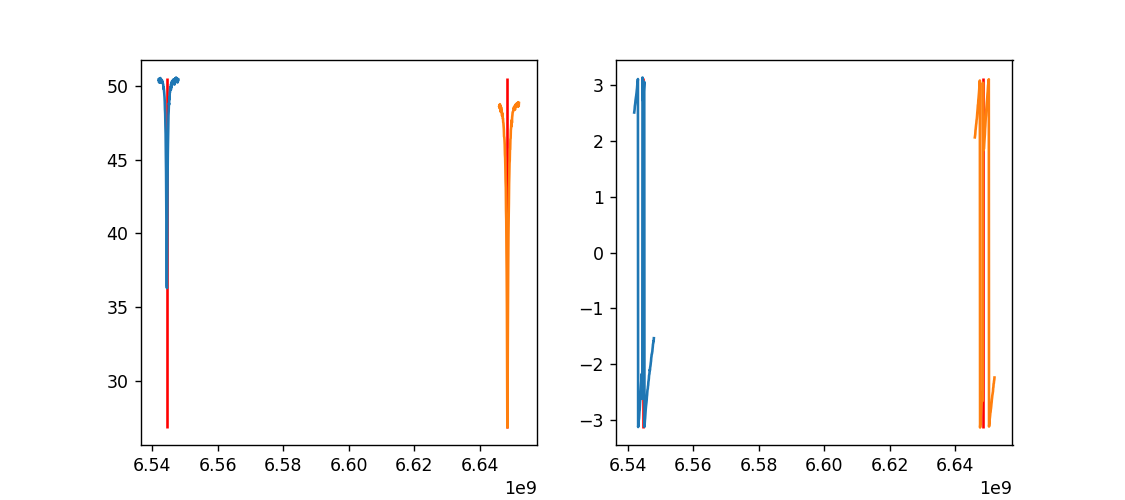

In [1415]:
measure.repeats=500
q_target = q1
freq = np.linspace(6.6,6.8,401)*1e9 
tag = q_target.q_name
# await mrw.jpa_switch(measure,state='OFF')
# await psg_pump.setValue('Output','OFF')
# await dc15.DC(jpa.bias)
f_lo, delta, n, f_res,base,f_s21, s_s21 = await mrw.again(q_target,measure,False,measure.f_lo)
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
axes[0].plot(f_s21,20*np.log10(np.abs(s_s21)))
axes[0].vlines(f_lo+delta,np.max(20*np.log10(np.abs(s_s21))),np.min(20*np.log10(np.abs(s_s21))),'r')
axes[1].vlines(f_lo+delta,np.max(np.angle(s_s21)),np.min(np.angle(s_s21)),'r')
axes[1].plot(f_s21,np.angle(s_s21))
plt.show()

## S21vsFlux

### DC

In [142]:
TDC = {'q10': [2.934, 0.032],
 'q9': [2.564, -0.158],
 'q8': [2.996, -0.015],
 'q6': [2.607, 0.22],
 'q5': [2.595, 0.237],
 'q4': [2.624, 0.216],
 'q3': [2.623, 0.178],
 'q2': [2.612, 0.218],
 'q1': [3.249, -0.242],
 'q7': [2.955, -0.058]}
for i, j in enumerate(TDC):
    measure.qubits[j].T_bias = TDC[j]

In [23]:
bits = [q1,q2,q3,q4,q5,q6,q7,q8,q9,q10]

current = np.linspace(-5,5,101)
# measure.readamp = [0.1]*10
# measure.ringup = [150]*10
# measure.ringupamp = [0.1]*10
# await measure.attinst['com8'].set_att(25)
for i in bits:
    tag = i.q_name
    readstate = [tag]
    print(i.inst)
    print(readstate)
#     await mrw.jpa_switch(measure,'ON')
    await psg[i.inst['ex_lo']].setValue('Output','OFF')
    job = Job(mrw.S21vsFlux, (i,measure,current,None,readstate), tags=[tag], max=len(current),auto_save=True)
    v_bias, f_bias, s_bias = await job.done()
    await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=None)
#     clear_output()

{'z_awg': 'awgZ1', 'z_ch': [1], 'ex_awg': 'awgEx1', 'ex_ch': [1, 2], 'ex_lo': 'psg_ex1', 'com': 'com3'}
['q1']


Output()

{'z_awg': 'awgZ1', 'z_ch': [2], 'ex_awg': 'awgEx1', 'ex_ch': [3, 4], 'ex_lo': 'psg_ex1', 'com': 'com3'}
['q2']


Output()

{'z_awg': 'awgZ1', 'z_ch': [3], 'ex_awg': 'awgEx2', 'ex_ch': [1, 2], 'ex_lo': 'psg_ex1', 'com': 'com3'}
['q3']


Output()

{'z_awg': 'awgZ1', 'z_ch': [4], 'ex_awg': 'awgEx2', 'ex_ch': [3, 4], 'ex_lo': 'psg_ex1', 'com': 'com3'}
['q4']


Output()

{'z_awg': 'awgZ2', 'z_ch': [1], 'ex_awg': 'awgEx3', 'ex_ch': [1, 2], 'ex_lo': 'psg_ex2', 'com': 'com3'}
['q5']


Output()

{'z_awg': 'awgZ2', 'z_ch': [2], 'ex_awg': 'awgEx3', 'ex_ch': [3, 4], 'ex_lo': 'psg_ex2', 'com': 'com3'}
['q6']


Output()

{'z_awg': 'awgZ2', 'z_ch': [3], 'ex_awg': 'awgEx4', 'ex_ch': [1, 2], 'ex_lo': 'psg_ex2', 'com': 'com3'}
['q7']


Output()

{'z_awg': 'awgZ2', 'z_ch': [4], 'ex_awg': 'awgEx4', 'ex_ch': [3, 4], 'ex_lo': 'psg_ex2', 'com': 'com3'}
['q8']


Output()

{'z_awg': 'awgZ3', 'z_ch': [1], 'ex_awg': 'awgEx5', 'ex_ch': [1, 2], 'ex_lo': 'psg_ex3', 'com': 'com3'}
['q9']


Output()

{'z_awg': 'awgZ3', 'z_ch': [2], 'ex_awg': 'awgEx5', 'ex_ch': [3, 4], 'ex_lo': 'psg_ex3', 'com': 'com3'}
['q10']


Output()

### Zpulse

In [140]:
TZP = {'q8': [2.11, -0.01343],
 'q7': [2.555, -0.05525],
 'q6': [2.402, 0.25364],
 'q5': [2.482, 0.24959],
 'q4': [2.62, 0.23749],
 'q3': [2.236, 0.17964],
 'q2': [2.015, 0.22525],
 'q1': [2.746, -0.25381],
 'q9': [2.312, -0.16609],
 'q10': [2.121, 0.03944]}
for i, j in enumerate(TZP):
    measure.qubits[j].T_z = TZP[j]

In [24]:
bits = [q1,q2,q3,q4,q5,q6,q7,q8,q9,q10]

current = np.linspace(-0.85,0.85,41)
# measure.readamp = [0.1]*10
# measure.ringup = [150]*10
# measure.ringupamp = [0.1]*10
# await measure.attinst['com8'].set_att(25)
for i in bits:
    tag = i.q_name
    readstate = [tag]
    print(i.inst)
    print(tag)
#     await mrw.jpa_switch(measure,'ON')
    await psg[i.inst['ex_lo']].setValue('Output','OFF')
    job = Job(mrw.S21vsFlux_awgoffset, (i,measure,current,None,readstate), tags=[tag], max=len(current),auto_save=True)
    v_bias, f_bias, s_bias = await job.done()
    await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=None)
#     clear_output()

{'z_awg': 'awgZ1', 'z_ch': [1], 'ex_awg': 'awgEx1', 'ex_ch': [1, 2], 'ex_lo': 'psg_ex1', 'com': 'com3'}
q1


Output()

{'z_awg': 'awgZ1', 'z_ch': [2], 'ex_awg': 'awgEx1', 'ex_ch': [3, 4], 'ex_lo': 'psg_ex1', 'com': 'com3'}
q2


Output()

{'z_awg': 'awgZ1', 'z_ch': [3], 'ex_awg': 'awgEx2', 'ex_ch': [1, 2], 'ex_lo': 'psg_ex1', 'com': 'com3'}
q3


Output()

{'z_awg': 'awgZ1', 'z_ch': [4], 'ex_awg': 'awgEx2', 'ex_ch': [3, 4], 'ex_lo': 'psg_ex1', 'com': 'com3'}
q4


Output()

{'z_awg': 'awgZ2', 'z_ch': [1], 'ex_awg': 'awgEx3', 'ex_ch': [1, 2], 'ex_lo': 'psg_ex2', 'com': 'com3'}
q5


Output()

{'z_awg': 'awgZ2', 'z_ch': [2], 'ex_awg': 'awgEx3', 'ex_ch': [3, 4], 'ex_lo': 'psg_ex2', 'com': 'com3'}
q6


Output()

{'z_awg': 'awgZ2', 'z_ch': [3], 'ex_awg': 'awgEx4', 'ex_ch': [1, 2], 'ex_lo': 'psg_ex2', 'com': 'com3'}
q7


Output()

{'z_awg': 'awgZ2', 'z_ch': [4], 'ex_awg': 'awgEx4', 'ex_ch': [3, 4], 'ex_lo': 'psg_ex2', 'com': 'com3'}
q8


Output()

{'z_awg': 'awgZ3', 'z_ch': [1], 'ex_awg': 'awgEx5', 'ex_ch': [1, 2], 'ex_lo': 'psg_ex3', 'com': 'com3'}
q9


Output()

{'z_awg': 'awgZ3', 'z_ch': [2], 'ex_awg': 'awgEx5', 'ex_ch': [3, 4], 'ex_lo': 'psg_ex3', 'com': 'com3'}
q10


Output()

## S21vsPower

In [147]:
measure.n

1

Output()

<IPython.core.display.Javascript object>


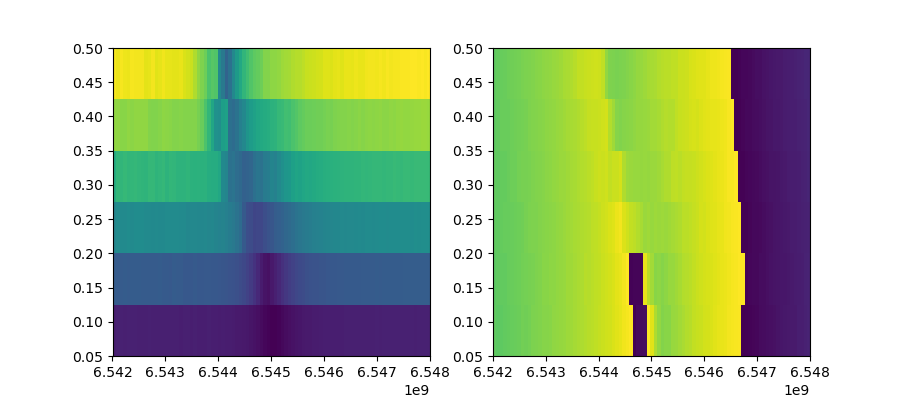

In [149]:
q_target, att = q1, np.linspace(0.05,0.5,6)
tag = q_target.q_name
# await mrw.jpa_switch(measure,'ON')
job = Job(mrw.S21vsPower, (q_target,measure,att), tags=[tag], max=len(att))
att_p, f_p, s_p = await job.done()
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
extent = [np.min(f_p[0][:,0]),np.max(f_p[0][:,0]),np.min(att_p[:,0]),np.max(att_p[:,0])]
axes[0].imshow(np.abs(s_p[:,:,0]),extent=extent,origin='lower',aspect='auto')
axes[1].imshow(np.angle(s_p[:,:,0]),extent=extent,origin='lower',aspect='auto')
plt.show()

## singlespec

In [1443]:
measure.repeats = 500
q_target = q3
dcstate = {}
# dcstate = {i: round(measure.qubits[i].T_bias[1]+measure.qubits[i].T_bias[0]/2,3) for i in measure.qubits}
# dcstate[q_target.q_name] = round(measure.qubits[q_target.q_name].T_bias[1]+measure.qubits[q_target.q_name].T_bias[0]*0.27,3)
# dcstate['q2'] = round(measure.qubits['q2'].T_bias[1]+measure.qubits['q2'].T_bias[0]*0.223,3)
# dcstate['q1'] = round(measure.qubits['q1'].T_bias[1]+measure.qubits['q1'].T_bias[0]*0.243,3)
# dcstate['q6'] = round(measure.qubits['q6'].T_bias[1]+measure.qubits['q6'].T_bias[0]*0,3)
# dcstate['q3'] = 0
# dcstate['q4'] = -1.5
# dcstate['q5'] = 3.0
# dcstate['q6'] = -0
# dcstate['q7'] = 0
# dcstate['q8'] = 2
# dcstate['q9'] = 3
# dcstate['q10'] = -2

measure.readamp = [0.05,0.05,0.05,0.13,0.13,0.13,0.13,0.035,0.035,0.04][:]
measure.ringup = [100,100,100,100,100,100,100,100,100,200][:]
measure.ringupamp = [0.1,0.1,0.1,0.13,0.13,0.13,0.13,0.13,0.13]
# measure.readamp = [0.03]*10
# measure.ringup = [100]*10
# measure.ringupamp = [0.1]*10
await mrw.dcManage(measure,dcstate=dcstate,readstate=['q1','q6'],calimatrix=None)
# await mrw.dcManage(measure,dcstate=dcstate,readstate=[q_target.q_name],calimatrix=None,qnum=10)

Output()

d:\qulab\qulab\yhs\optimize.py:416: RuntimeWarning: divide by zero encountered in double_scalars
  c = 1 / bw**2
d:\qulab\qulab\yhs\optimize.py:400: RuntimeWarning: invalid value encountered in multiply
  return a/(1.0+c*(x-b)**2)+d
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:699: RuntimeWarning: invalid value encountered in subtract
  if (np.max(np.ravel(np.abs(sim[1:] - sim[0]))) <= xatol and
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:704: RuntimeWarning: invalid value encountered in subtract
  xr = (1 + rho) * xbar - rho * sim[-1]
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:746: RuntimeWarning: invalid value encountered in subtract
  sim[j] = sim[0] + sigma * (sim[j] - sim[0])


<IPython.core.display.Javascript object>


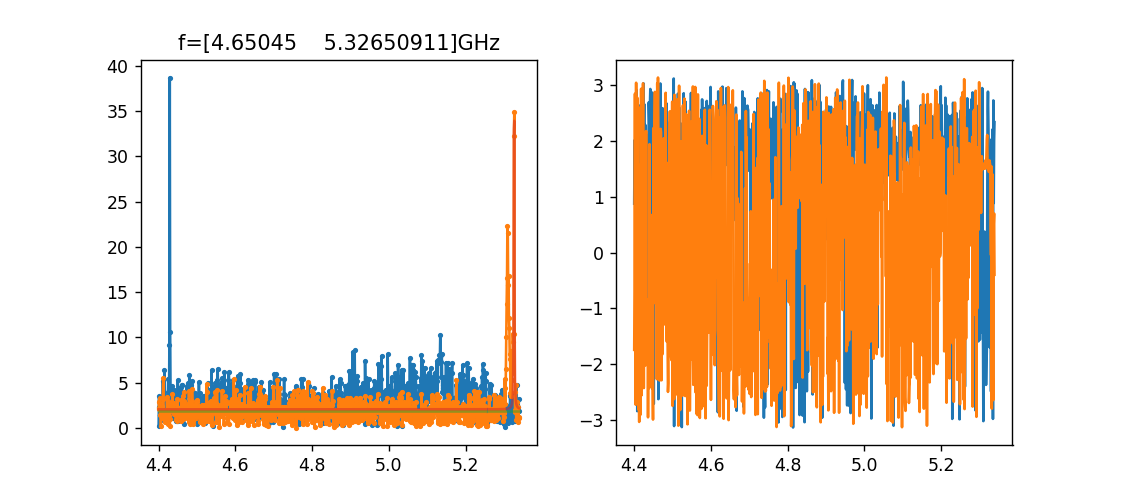

[(4.650450000000012, 0.0), (5.3265091073738295, 1.2624914821707154)]


In [870]:
# await measure.psg['psg_trans'].setValue('Power',-10)
measure.repeats = 500
freq = np.arange(4.4,5.34,0.001)*1e9
qubit = q1
# await measure.psg[qubit.inst['ex_lo']].setValue('Power',0)
# await mrw.jpa_switch(measure,'OFF')
job = Job(mrw.singlespec, (measure,freq,True,measure.f_lo,True,[qubit.q_name]), tags=(measure.qubitToread), max=len(freq))
f_ss, s_ss = await job.done()
# state = await cww.QueryInst(measure)
index = np.abs(s_ss).argmax(axis=0)
x,y,z,band, peak= f_ss/1e9, s_ss,[],[], []
f_rabi = np.array([x[:,i][j] for i, j in enumerate(index)])
for i in range(np.shape(s_ss)[1]):
    res,func, e = op.Lorentz_Fit().fitLorentz(x[:,i],np.abs(y[:,i]))
#     index, prominences, widths = op.RowToRipe().findPeaks(np.abs(y[:,i]))
    a,b,c,d = res.x
    z.append(a/(1.0+c*(x[:,i]-b)**2)+d)
    band.append((b,e))
#     peak.append([x[:,i][index],np.abs(y[:,i])[index]])
z = np.array(z).T

fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
axes[0].plot(x,np.abs(y),'-o',markersize=2)
axes[0].plot(x,z,alpha=0.5)
# axes[0].plot(np.array(peak)[:,0],np.array(peak)[:,1],'-o',alpha=0.5)
axes[0].set_title(f'f={np.array(band)[:,0]}GHz')
print(band)
axes[1].plot(x,np.angle(y))
plt.show()
# await measure.psg[qubit.inst['ex_lo']].setValue('Power',24)

In [871]:
f_rabi

array([4.429, 5.327])

In [872]:
for i,j in enumerate(measure.qubitToread):
    state = {}
    measure.qubits[j].replace(f_ex=f_rabi[i]*1e9,state=[state,measure.delta,measure.base,measure.readlen])

In [33]:
state = {}
q1.replace(f_ex=f_rabi[0]*1e9,state=[state,measure.delta,measure.base,measure.readlen])
# state = {}
# q2.replace(f_ex=f_rabi[1]*1e9,state=[state,measure.delta,measure.base,measure.readlen])

In [40]:
q2.f_ex

5118706582.338865

### specbias

In [401]:
qubit = q7
ftarget = 4.463e9
bias =  np.arange(0.4,0.7,0.01)-2
job = Job(mrw.specbias,(qubit,measure,ftarget,bias), tags=(measure.qubitToread), max=len(bias))
f_ss, s_ss = await job.done()

Output()

### specbias_awg

In [244]:
q1.f_ex

4687120907.16461

In [248]:
qubit = q1
dcstate={'q1':-0.34129024643850775}
ftarget = 5118597416.373868
bias =  np.arange(-0.4,0.4,0.001)
calimatrix=None
modulation=True

job = Job(mrw.specbias_awg,(measure,qubit,ftarget,bias,dcstate,calimatrix,modulation), tags=(measure.qubitToread), max=len(bias))
f_ss, s_ss = await job.done()

Output()

## Rabi

In [839]:
q6.inst = {'z_awg': 'awgZ2',
 'z_ch': [2],
 'ex_awg': 'awgEx3',
 'ex_ch': [3, 4],
 'ex_lo': 'psg_ex2',
 'com': 'com3'}

{'z_awg': 'awgZ2',
 'z_ch': [2],
 'ex_awg': 'awgEx3',
 'ex_ch': [3, 4],
 'ex_lo': 'psg_ex2',
 'com': 'com3'}

In [841]:
q6.inst = {'z_awg': 'awgZ2',
 'z_ch': [2],
 'ex_awg': 'awgEx4',
 'ex_ch': [1, 2],
 'ex_lo': 'psg_ex2',
 'com': 'com3'}

In [855]:
q6.replace(envelopename=['gaussian',2],amp=1,nwave=1,shift=200e-9,phase=0,phaseDiff=0,delta_ex=200e6,pi_len=20e-9,\
         seqtype='PDD',detune=3e6)

In [1441]:
await measure.psg[q1.inst['ex_lo']].setValue('Frequency',q1.f_ex-q1.delta_ex)

In [1439]:
q1.f_ex-q1.delta_ex

4434232522.726693

In [1438]:
q1.delta_ex=-180

In [1442]:
q1.f_ex-4614232342.726693

-180000000.0

INFO:qulab.dht.crawling:creating spider with peers: [[694931976776429100391351222657914630954962137837, '10.0.200.182', 8987], [527103872101154279583776248562347986930985465192, '10.0.200.182', 8987], [368799422908015144629842963746924328731309189868, '10.0.200.182', 49813], [309064898816187390240202570210084526907012357374, '10.0.200.182', 52625], [231986586240324261327814388999395707938646128426, '10.0.200.182', 57919], [98493373441898506441853160100232235050955579911, '10.0.200.182', 64578], [750572850604650343628261022285187894141067339, '10.0.200.182', 61714], [1354524387964993403394841663719033253613950601091, '10.0.200.182', 52709], [1082617405098879819486992087054499645453503169313, '10.0.200.182', 53682], [912161896802313633575153945197946376184360096900, '10.0.200.182', 59789]]
INFO:qulab.dht.crawling:crawling network with nearest: ([694931976776429100391351222657914630954962137837, '10.0.200.182', 8987], [527103872101154279583776248562347986930985465192, '10.0.200.182', 8987

INFO:qulab.dht.protocol:got successful response from 10.0.200.182:52709


In [1425]:
q1.delta_ex=180e6

In [1090]:
q1.pi_len=20e-9

Output()

<IPython.core.display.Javascript object>


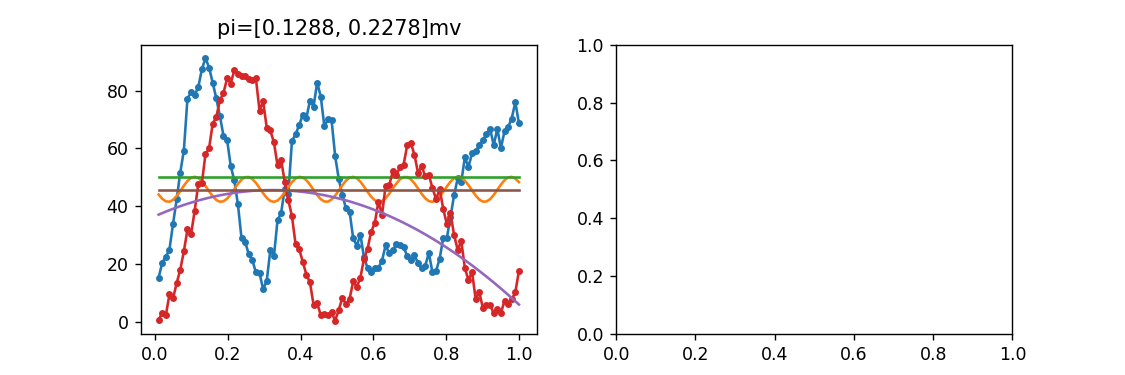

(39.95140238884542, 45.820944288392226, 20000, 4.000400040004001, 0)
(43.275776850007745, 35.45222879024022, 20000, 2.0002000200020005, 0)


In [1434]:
q_target = ['q1','q6']
num = measure.qubitToread.index(q_target[0])

amp = np.linspace(0.01,1,101)
# amp = np.linspace(1,200,100)
# await awg100.write('TRIG:SOUR %s'%'INT') 
arg = 'pi_len' if np.max(amp)>1 else 'amp'
job = Job(mrw.rabi, (measure,amp,arg,q_target), tags=q_target, max=len(amp))
v_rp, s_rp = await job.done()
await cww.OffEx(q_target,measure)

fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,3))
t_op = []
for i in range(np.shape(s_rp)[1]):
    x, y = v_rp[:,i], np.abs(s_rp[:,i])
    t_op.append(op.RowToRipe().firstMax(x,y,num=0,peakpercent=0.8))
    A,B,T1,w,phi,out = op.Rabi_Fit(envelopemethod='hilbert',phi=0).fitRabi(np.abs(x),np.abs(y))
    z = A*np.exp(-x/T1)*np.cos(2*np.pi*w*x+phi) + B
    env = A*np.exp(-x/T1) + B
    axes[0].plot(x,y,'-o',markersize=3)
    axes[0].plot(x,z)
    axes[0].plot(x,env)
    axes[0].set_title(f'pi={t_op}mv')
plt.show()

In [1377]:
t_op

[0.1387, 0.2278]

In [1378]:
measure.qubits[q_target[0]].amp = t_op[num]

In [1375]:
measure.qubits[q_target[0]].amp 

0.2674

In [1376]:
q1.amp

0.2674

## Ramsey

Output()

d:\qulab\qulab\yhs\optimize.py:264: RuntimeWarning: overflow encountered in exp
  return np.sum((A * np.exp(-T2*x**2-x*T1) + B - y)**2)
d:\qulab\qulab\yhs\optimize.py:264: RuntimeWarning: overflow encountered in square
  return np.sum((A * np.exp(-T2*x**2-x*T1) + B - y)**2)
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


(0.40994702766333146, 0.8178845171916822, 30000, 519.7521291203944, 0.006930693069306931, 0)


d:\qulab\qulab\yhs\optimize.py:493: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-(x/T2)**2-x/T1/2)*np.cos(2*np.pi*w*x+phi) + B
d:\qulab\qulab\yhs\optimize.py:496: RuntimeWarning: overflow encountered in square
  return np.sum((self.func(x,para) - y)**2)


<IPython.core.display.Javascript object>


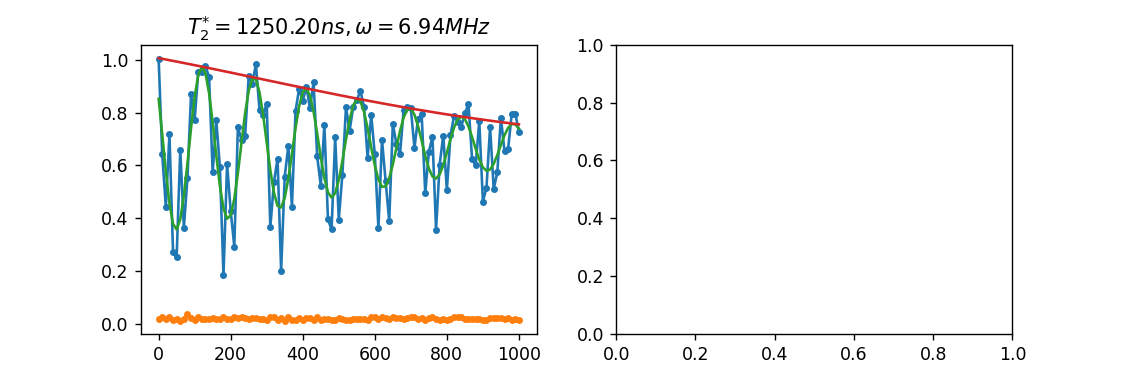

4434232342.726693


In [1397]:
t_Ramsey, q_target = np.linspace(0,1000,101), ['q1']
measure.qubits[q_target[0]].replace(nwave=0,seqtype='PDD',detune=4e6)
num = measure.qubitToread.index(q_target[0])
popRead = True  #True 返回概率，False返回幅值

job = Job(mrw.Ramsey, (measure,t_Ramsey,q_target,popRead), tags=q_target, max=len(t_Ramsey))
t_ram, s_ram = await job.done()
await cww.OffEx(q_target,measure)

x, y = t_ram[:,num], np.abs(s_ram[:,num])
res, func = op.T2_Fit(T1=30000,funcname='gauss',envelopemethod='hilbert').fitT2(x,np.abs(y))
A,B,T1,T2,w,phi = res.x
z = func(x,res.x)
z_env = A*np.exp(-(x/T2)**2-x/T1/2) + B
# w,yt,amp = op.RowToRipe().fourier(x,y)
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,3))
axes[0].plot(t_ram,np.abs(s_ram),'-o',markersize=3)
axes[0].plot(x,z)
axes[0].plot(x,z_env)
axes[0].set_title('$T_{2}^{*}=%.2fns,\omega=%.2fMHz$'%(T2,w*1e3))
# axes[1].plot(yt[yt!=0],np.abs(amp[yt!=0]))
plt.show()
q_target = measure.qubits[q_target[0]]
q_target.f_ex = q_target.f_ex -(w*1e9-q_target.detune)
print(q_target.f_ex)

In [925]:
q_target.f_ex = q_target.f_ex -2*(w*1e9-q_target.detune)

In [370]:
q1.delta_ex,q2.delta_ex

(-35720559.62086201, 395720559.620862)

In [485]:
q1.f_ex,q2.f_ex = (4687108858.317946, 5118634548.716476)

In [1359]:
q1.delta_ex,q2.delta_ex

(180000000.0, 427500000.000082)

In [420]:
q1.f_ex,q2.f_ex

(4687120907.16461, 5118562026.406334)

In [409]:
measure.qubits['q1'].delta_ex

-35762845.19926548

## T1

Output()

d:\qulab\qulab\yhs\optimize.py:267: RuntimeWarning: overflow encountered in exp
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\yhs\optimize.py:267: RuntimeWarning: overflow encountered in square
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
d:\qulab\qulab\yhs\optimize.py:267: RuntimeWarning: overflow encountered in multiply
  return np.sum((A * np.exp(-x*T1) + B - y)**2)


<IPython.core.display.Javascript object>


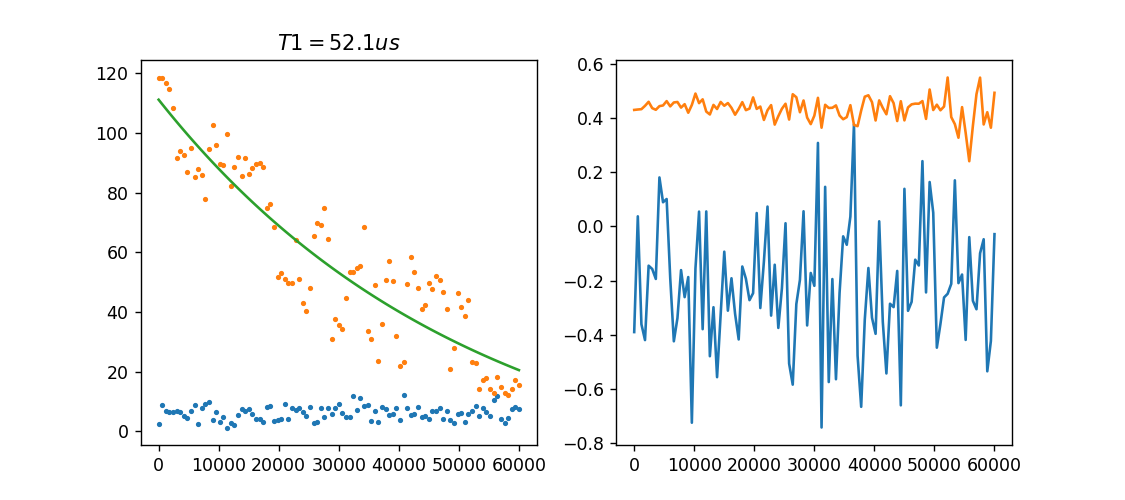

In [89]:
t_T1, q_target = np.linspace(0,60000,101,endpoint=True), ['q2']
# await measure.awg['awg1'].da_set_trig_delay(measure.ad_trig_delay+60000e-9)   #
num = measure.qubitToread.index(q_target[0])
measure.repeats=500

job = Job(mrw.T1, (measure,t_T1,q_target,False),title='T1', tags=q_target, max=len(t_T1))
t_t, s_t = await job.done()
await cww.OffEx(q_target,measure)   

A, B, T1 = op.Exp_Fit().fitExp(t_t[:,num],np.abs(s_t[:,num]))
z = A * np.exp(-t_t[:,num]*T1) + B
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
axes[0].plot(t_t,np.abs(s_t),'o',markersize=2)
axes[0].plot(t_t[:,0],z)
axes[0].set_title('$T1=%.1fus$'%(1/T1/1000))
axes[1].plot(t_t,np.angle(s_t))
plt.show()

In [94]:
dcb = np.arange(-3,0,0.1)
freq = np.arange(4.0,5.2,0.001)*1e9
F_rabi=[]
T1_spec=[]
S_T1=[]
q_target = ['q8']
dcstate = {}
# dcb = np.array([0.46,0.44])
await mrw.jpa_switch(measure,'ON')
for l in dcb:
    ###singlespec
    measure.readamp = [0.2,0.13,0.13,0.13,0.13,0.13,0.13,0.035,0.035,0.04][:]
    measure.ringup = [100,100,100,100,100,100,100,100,100,200][:]
    measure.ringupamp = [0.2,0.13,0.13,0.13,0.13,0.13,0.13]
    measure.repeats = 500
    dcstate[q_target[0]] = -2+l
    await mrw.dcManage(measure,dcstate=dcstate,readstate=q_target,calimatrix=None)
    job = Job(mrw.singlespec, (measure,freq,True,measure.f_lo,True,q_target), tags=(measure.qubitToread), max=len(freq),auto_save=True)
    f_ss, s_ss = await job.done()
    x,y,z,band, peak= f_ss/1e9, s_ss,[],[], []
    index = np.abs(s_ss).argmax(axis=0)
    f_rabi = np.array([x[:,i1][j1] for i1, j1 in enumerate(index)])
    F_rabi.append(f_rabi)
    state = {}
    measure.qubits[q_target[0]].replace(f_ex=f_rabi[0]*1e9,state=[state,measure.delta,measure.base,measure.readlen])
    
    ####rabi
    amp = np.linspace(0.01,1,101)
    # amp = np.linspace(1,200,100)
    # await awg100.write('TRIG:SOUR %s'%'INT') 
    arg = 'pi_len' if np.max(amp)>1 else 'amp'
    job = Job(mrw.rabi, (measure,amp,arg,q_target), tags=q_target, max=len(amp),auto_save=True)
    v_rp, s_rp = await job.done()
    t_op = []
    for i in range(np.shape(s_rp)[1]):
        x, y = v_rp[:,i], np.abs(s_rp[:,i])
        t_op.append(op.RowToRipe().firstMax(x,y,num=0,peakpercent=0.8))
        measure.qubits[q_target[0]].amp = t_op[0]
        
        
    ###T1
    measure.repeats=5000
    t_T1, q_target = np.linspace(0,60000,201,endpoint=True), q_target
    num = 0
    job = Job(mrw.T1, (measure,t_T1,q_target,False),title='T1', tags=q_target+str('%f')%f_rabi, max=len(t_T1),auto_save=True)
    t_t, s_t = await job.done()
    S_T1.append(s_t)
    A, B, T1 = op.Exp_Fit().fitExp(t_t[:,num],np.abs(s_t[:,num]))
    T1_spec.append(T1)
    
    
    
np.savez(r'TT_%s_amp.npz'%(q_target[0]),t=t_t,T1_2d=S_T1,T1data=np.array(T1_spec)*1e6,Frabi=F_rabi)

Output()

Output()

Output()

d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in exp
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in multiply
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in square
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


Output()

Output()

Output()

d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in exp
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in square
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in multiply
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


Output()

Output()

Output()

d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in exp
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in square
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in multiply
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


Output()

Output()

Output()

d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in exp
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in multiply
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in square
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Output()

Output()

Output()

d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in exp
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in square
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in multiply
  return np.sum((A * np.exp(-x*T1) + B - y)**2)


Output()

Output()

Output()

d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in exp
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in square
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in multiply
  return np.sum((A * np.exp(-x*T1) + B - y)**2)


Output()

Output()

Output()

d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in exp
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in multiply
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in square
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


Output()

Output()

Output()

d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in exp
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in multiply
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in square
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


Output()

Output()

Output()

d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in exp
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in square
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in multiply
  return np.sum((A * np.exp(-x*T1) + B - y)**2)


Output()

Output()

Output()

d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in square
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in exp
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in multiply
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


Output()

Output()

Output()

d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in exp
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in square
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in multiply
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


Output()

Output()

Output()

d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in exp
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in multiply
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in square
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


Output()

Output()

Output()

d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in exp
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in square
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in multiply
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


Output()

Output()

Output()

d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in exp
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in square
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in multiply
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


Output()

Output()

Output()

d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in exp
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in square
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in multiply
  return np.sum((A * np.exp(-x*T1) + B - y)**2)


Output()

Output()

Output()

d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in exp
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in square
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in multiply
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


Output()

Output()

Output()

d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in exp
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in square
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in multiply
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


Output()

Output()

Output()

d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in exp
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in square
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in multiply
  return np.sum((A * np.exp(-x*T1) + B - y)**2)


Output()

Output()

Output()

d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in exp
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in square
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in multiply
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


Output()

Output()

Output()

d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in square
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in exp
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in multiply
  return np.sum((A * np.exp(-x*T1) + B - y)**2)


Output()

Output()

Output()

d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in exp
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in square
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


Output()

Output()

Output()

d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in square
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in exp
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in multiply
  return np.sum((A * np.exp(-x*T1) + B - y)**2)


Output()

Output()

Output()

d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in exp
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in square
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in multiply
  return np.sum((A * np.exp(-x*T1) + B - y)**2)


Output()

Output()

Output()

d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in exp
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in multiply
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in square
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


Output()

Output()

Output()

d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in exp
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in square
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in multiply
  return np.sum((A * np.exp(-x*T1) + B - y)**2)


Output()

Output()

Output()

d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in exp
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in square
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in multiply
  return np.sum((A * np.exp(-x*T1) + B - y)**2)


Output()

Output()

Output()

d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in exp
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in square
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in multiply
  return np.sum((A * np.exp(-x*T1) + B - y)**2)


Output()

Output()

C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Output()

d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in exp
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in square
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in multiply
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


Output()

Output()

C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Output()

d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in exp
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in square
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in multiply
  return np.sum((A * np.exp(-x*T1) + B - y)**2)


Output()

Output()

Output()

d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in exp
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in square
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in multiply
  return np.sum((A * np.exp(-x*T1) + B - y)**2)


In [396]:
# await cww.ats_setup(measure,measure.delta,readlen=measure.readlen,repeats=10000)

t_T1, q_target = np.linspace(0,60000,201,endpoint=True), ['q7']
N = 20
TT1= []
for i in np.arange(N):
    job = Job(mrw.T1, (measure,t_T1,q_target,True),title='T1', tags=q_target, max=len(t_T1),auto_save=True)
    t_t, s_t = await job.done()
    TT1.apped(s_t)
TT1=np.array(TT1)

Output()

IndexError: list index out of range

In [ ]:
np.savez(r'TT1.npz',t=t_t,data=TT1)

<IPython.core.display.Javascript object>


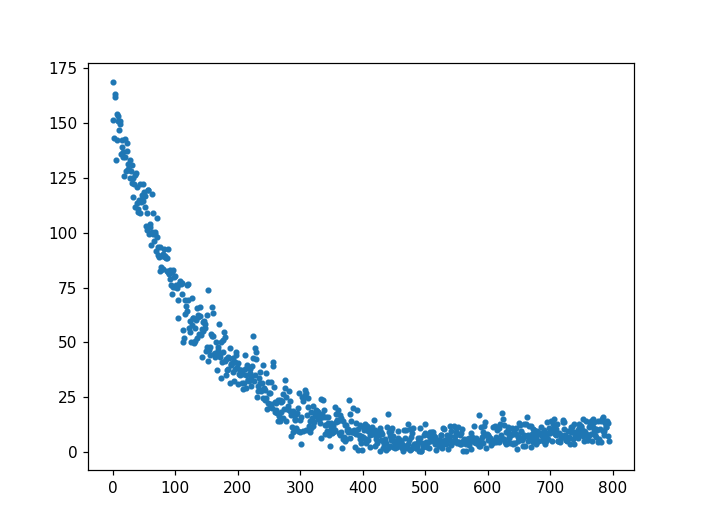

In [478]:
plt.figure()
plt.plot(abs(S_t[:,:,0])[2][6:],'.')

In [395]:
T1

2.6914710771055036e-05

d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in exp
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in multiply
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
d:\qulab\qulab\zsk\optimize.py:264: RuntimeWarning: overflow encountered in square
  return np.sum((A * np.exp(-x*T1) + B - y)**2)
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


<IPython.core.display.Javascript object>


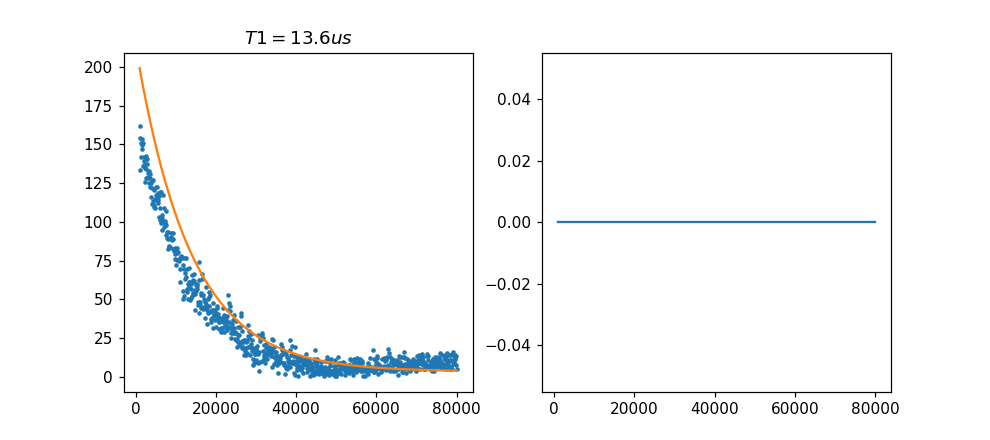

In [476]:
start=10
A, B, T1 = op.Exp_Fit().fitExp(t_T1[start:],abs(S_t[:,:,0])[5][start:])
z = A * np.exp(-t_T1[start:]*T1) + B
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
axes[0].plot(t_T1[start:],np.abs(abs(S_t[:,:,0])[2][start:]),'o',markersize=2)
axes[0].plot(t_T1[start:],z)
axes[0].set_title('$T1=%.1fus$'%(1/T1/1000))
axes[1].plot(t_T1[start:],np.angle(abs(S_t[:,:,0])[2][start:]))
plt.show()

<IPython.core.display.Javascript object>


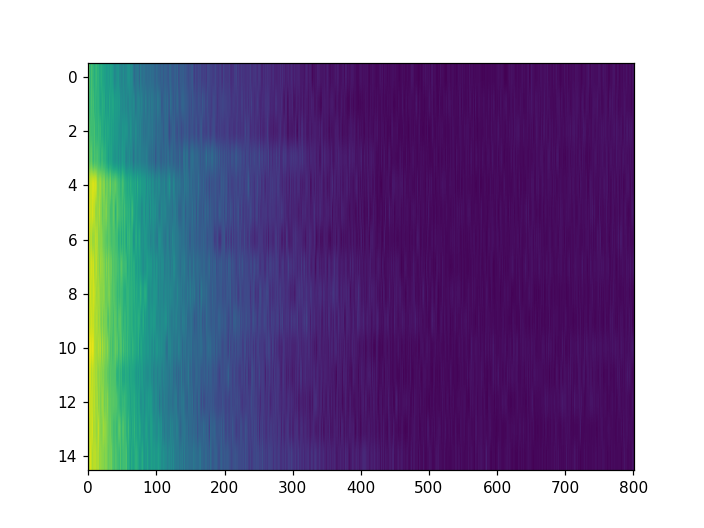

In [473]:
(np.shape(abs(S_t[:,:,0])))
plt.figure()
plt.imshow(abs(S_t[:,:,0]),aspect='auto')

In [161]:
qubit = q7
pulse = await cww.rabiWave(envelopename=qubit.envelopename,nwave=1,amp=qubit.amp,\
            pi_len=qubit.pi_len,shift=1*qubit.pi_len+100e-9,delta_ex=qubit.delta_ex)

rpulse =  await cww.readWave(measure,delta,readlen=2000,pi_len=qubit.pi_len)

<IPython.core.display.Javascript object>


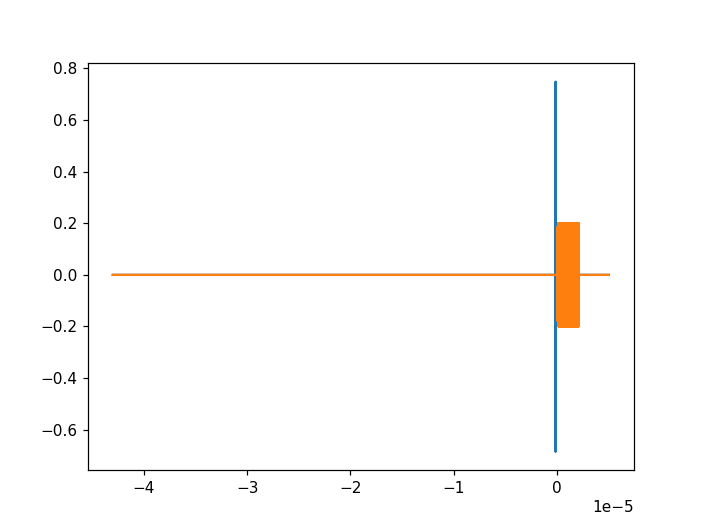

In [162]:
t_new = np.linspace(-43000,5000,96000)*1e-9
# pulselist1 = await cww.funcarg(cww.rabiWave,q7,shift=0)
# pulselist2 = await cww.funcarg(cww.rabiWave,q8,shift=5000/1e9)
# pulselist3 = await cww.funcarg(cww.rabiWave,q8,shift=20000/1e9)
plt.figure()
plt.plot(t_new,pulse[0])
plt.plot(t_new,rpulse[0])
# plt.plot(t_new,pulselist3[0])

## SpinEcho

Output()

d:\qulab\qulab\yhs\optimize.py:264: RuntimeWarning: overflow encountered in exp
  return np.sum((A * np.exp(-T2*x**2-x*T1) + B - y)**2)
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
d:\qulab\qulab\yhs\optimize.py:264: RuntimeWarning: overflow encountered in square
  return np.sum((A * np.exp(-T2*x**2-x*T1) + B - y)**2)


(0.47482693517935803, 0.8243656444207282, 30000, 4495.8988394918, 0.0009950248756218905, 0)


d:\qulab\qulab\yhs\optimize.py:496: RuntimeWarning: overflow encountered in square
  return np.sum((self.func(x,para) - y)**2)
d:\qulab\qulab\yhs\optimize.py:493: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-(x/T2)**2-x/T1/2)*np.cos(2*np.pi*w*x+phi) + B


<IPython.core.display.Javascript object>


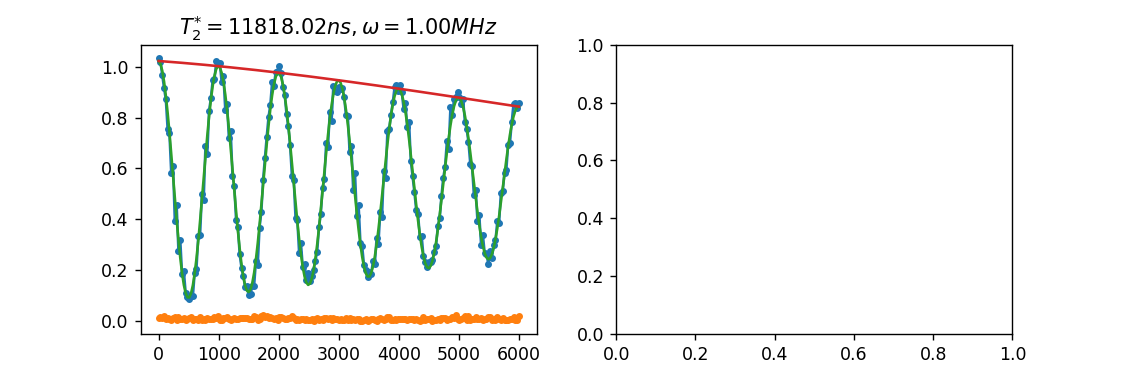

In [187]:
t_spin, q_target = np.linspace(0,6000,201), ['q1']
measure.qubits[q_target[0]].replace(nwave=1,seqtype='CPMG',detune=1e6)
num = measure.qubitToread.index(q_target[0])
popRead = True #True 返回概率，False返回幅值

job = Job(mrw.SpinEcho, (measure,t_spin,q_target,popRead), tags=q_target, max=len(t_spin))
t_sp, s_sp = await job.done()
await cww.OffEx(q_target,measure)

x, y = t_sp[:,num], s_sp[:,num]
res, func = op.T2_Fit(T1=30000,funcname='gauss',envelopemethod='hilbert').fitT2(x,np.abs(y))
A,B,T1,T2,w,phi = res.x
z = func(x,res.x)
z_env = A*np.exp(-(x/T2)**2-x/T1/2) + B
# w,yt,amp = op.RowToRipe().fourier(x,y)
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,3))
axes[0].plot(t_sp,np.abs(s_sp),'-o',markersize=3)
axes[0].plot(x,z)
axes[0].plot(x,z_env)
axes[0].set_title('$T_{2}^{*}=%.2fns,\omega=%.2fMHz$'%(T2,w*1e3))
# axes[1].plot(yt[yt!=0],np.abs(amp[yt!=0]))
plt.show()

## 优化pi脉冲

Output()

<IPython.core.display.Javascript object>


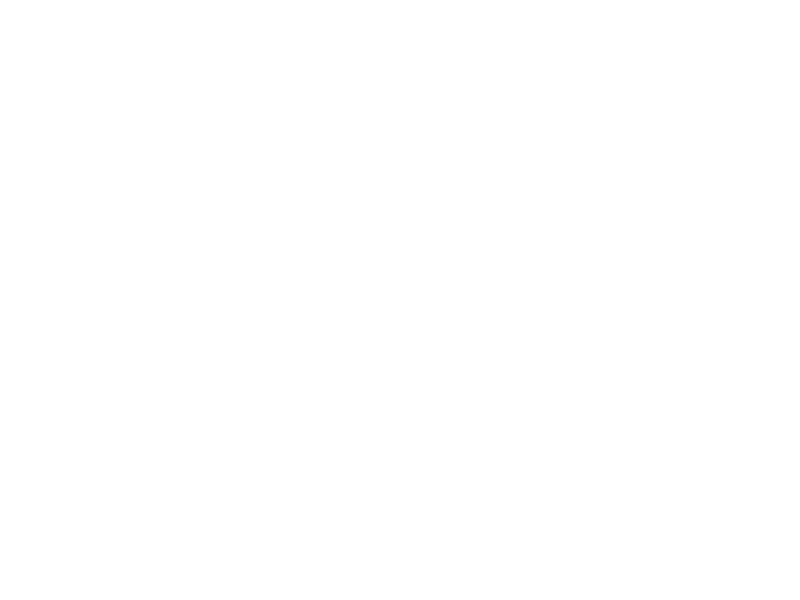

Output()

<IPython.core.display.Javascript object>


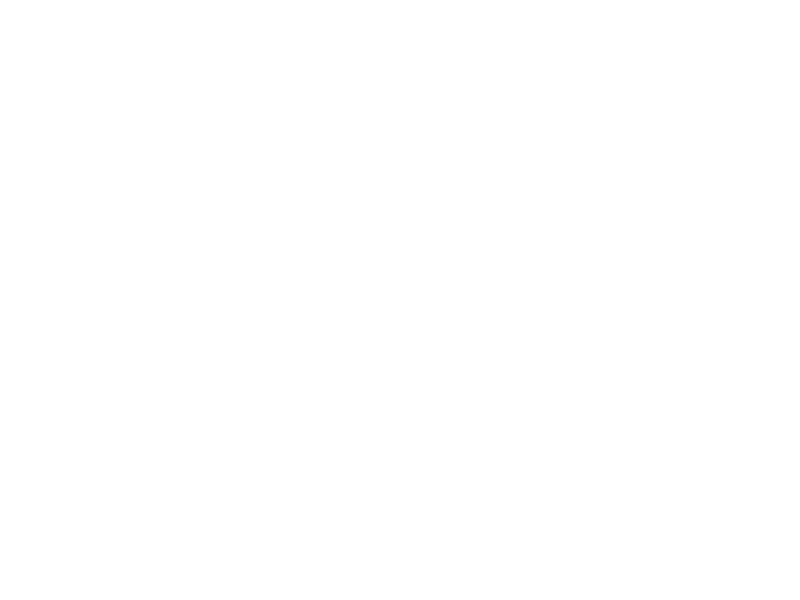

In [90]:
bits = [q1,q2]
# await cww.RecoverInst(measure, state)
# await psg_ex1.setValue('Moutput','ON')
for i in bits:
    q_target = i
    processlist = [mrw.pipulseOpt]
    para = {'exstate':[q_target.q_name],'nwave':7,'wavlen':101,'optwhich':'amp'}
    paraslist = [para]
    maxlist = [para['nwave']]
    update_state = [False]
    whichexe = [0]
    saveQubitstate = [False]
    await mrw.dispatcher(measure,whichexe,processlist,paraslist,tags=[q_target.q_name],\
                         maxlist=maxlist,update_state=update_state)
    await cww.OffEx([q_target.q_name],measure)

In [92]:
q2.amp

0.2940017

## 优化读出点

Output()

<IPython.core.display.Javascript object>


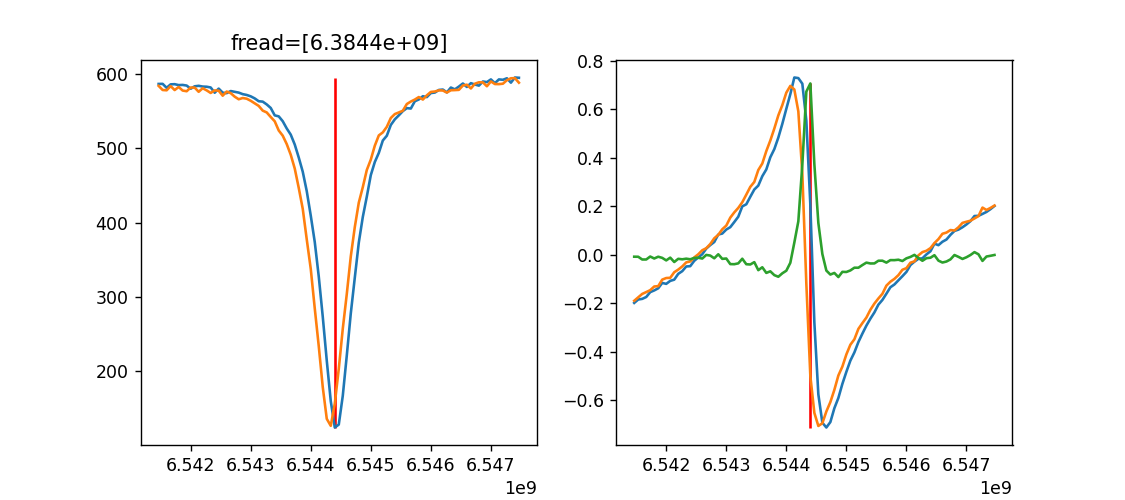

In [206]:
q_target = ['q1']
# await measure.attinst['com8'].set_att(30)
# await measure.attinst[q_target.inst['com']].set_att(q_target.power_rabi)
# await mrw.jpa_switch(measure,state='ON')
# await psg[q_target.inst['ex_lo']].setValue('Frequency',(q_target.f_ex+q_target.delta_ex))

job = Job(mrw.readOp, (measure,q_target), tags=q_target, max=2)
st, f_op, s_op= await job.done()
f_lo_m = []
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
for i in range(measure.n):
#     f, s_off, s_on, s_on2 = f_op[:,:,i][0], s_op[:,:,i][0], s_op[:,:,i][1], s_op[:,:,i][2]
    f, s_off, s_on = f_op[:,:,i][0], s_op[:,:,i][0], s_op[:,:,i][1]
    if i == eval(q_target[0][1:])-1:
        f_off = f[np.argmin(np.abs(s_off))]
        f_on = f[np.argmin(np.abs(s_on))]
#         f_on2 = f[np.argmin(np.abs(s_on2))]
    f_lo1 = (f[np.argmin(np.abs(s_off))] + f[np.argmin(np.abs(s_on))])/2
    x_off, y_off = op.RowToRipe().deductPhase(f,s_off)
    x_on, y_on = op.RowToRipe().deductPhase(f,s_on)
    anglediff = (np.angle(y_off[0])-np.angle(y_on[0]))
    index = np.abs(anglediff).argmax(axis=0)
    #index = np.abs(s_off).argmin(axis=0)
    f_lo_m.append(f[index] if np.abs(f[index]-f_lo1)<0.1e6 else f_lo1)
    axes[0].plot(f_op[:,:,i].T,np.abs(s_op[:,:,i].T))
    axes[0].vlines(f_lo_m,np.max(np.abs(s_op[:,:,i].T)),np.min(np.abs(s_op[:,:,i].T)),'r')
    axes[1].plot(x_off,np.angle(y_off[0]))
    axes[1].plot(x_on,np.angle(y_on[0]))
    axes[1].plot(x_off,anglediff)
    axes[1].vlines(f_lo_m,np.max(anglediff),np.min(np.angle(y_off[0])),'r')
plt.show()
f_lo, delta, n = await mrw.resn(np.array(f_lo_m))
measure.f_lo, measure.delta, measure.n = f_lo, delta, n
axes[0].set_title(f'fread={f_lo-measure.delta}')
await psg['psg_lo'].setValue('Frequency',f_lo)
for q in q_target:
    for ch in measure.qubits[q].inst['ex_ch']:
        await measure.awg[measure.qubits[q].inst['ex_awg']].output_off(ch=ch)

In [279]:
q1.delta_ex = -200e6

# 单比特f12标定

## 二能级—alpha

['q1']


Output()

<IPython.core.display.Javascript object>


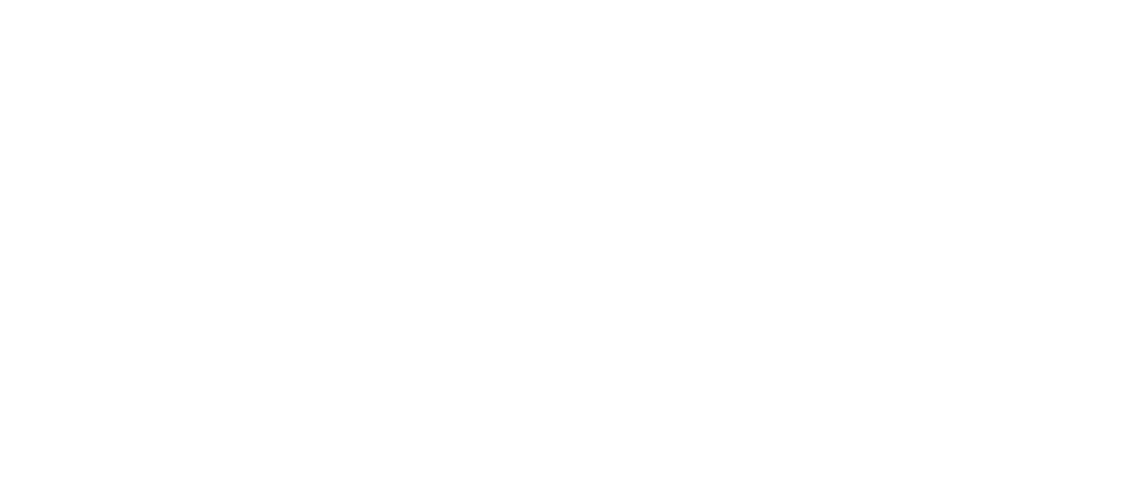

ValueError: operands could not be broadcast together with shapes (100,) (101,) 

In [1098]:
q_target = ['q1']
delta_ex=230e6
print(q_target)
job = Job(mrw.fLevel, (measure,q_target,delta_ex,True), tags=q_target, max=201)
fall, sall = await job.done()
await cww.OffEx(q_target,measure)
# fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
# l = np.shape(fall)[0]//2
# f1, f2, s1, s2 = fall[:l,0], fall[l:,0], np.abs(sall[:l,0]), np.abs(sall[l:,0])
# z1 = np.poly1d(np.polyfit(f1,s1,1))(f1)
# z2 = np.poly1d(np.polyfit(f2,s2,1))(f2)
# index = np.argmin(np.abs(z1-z2))
# axes[0].plot(np.array([f1,f2]).T,np.array([s1,s2]).T,'.')
# axes[0].plot(np.array([f1,f2]).T,np.array([z1,z2]).T)
# # axes[0].plot(fall[l:,:],np.abs(sall[l:,:]))
# axes[0].plot([f1[index],f2[index]],[z1[index],z2[index]],'ko')
# axes[0].set_title(f'alpha={round(f1[index],3)}')
# plt.show()


In [1099]:
measure.qubits[q_target[0]].alpha = 217e6

## 二能级Rabi

In [1100]:
q_target = q1
t_rabi = np.linspace(1,100,100)
pop = True
job = Job(mrw.fRabi, (measure,t_rabi,[q_target.q_name],pop), tags=[q_target.q_name], max=len(t_rabi))
fall, sall = await job.done()
await cww.OffEx([q_target.q_name],measure)

Output()

In [ ]:
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,3))
t_op = []
for i in range(np.shape(sall)[1]):
    x, y = fall[:,i], np.abs(sall[:,i])
    t_op.append(op.RowToRipe().firstMax(x,y,num=0,peakpercent=0.8))
    A,B,T1,w,phi,out = op.Rabi_Fit(envelopemethod='hilbert',phi=0).fitRabi(np.abs(x),np.abs(y))
    z = A*np.exp(-x/T1)*np.cos(2*np.pi*w*x+phi) + B
    env = A*np.exp(-x/T1) + B
    axes[0].plot(x,y,'-o',markersize=3)
    axes[0].plot(x,z)
    axes[0].plot(x,env)
    axes[0].set_title(f'pi={t_op}ns')
plt.show()

In [1102]:
q_target.pi_len2 = 19e-9

## 二能级Ramsey

Output()

d:\qulab\qulab\yhs\optimize.py:264: RuntimeWarning: overflow encountered in exp
  return np.sum((A * np.exp(-T2*x**2-x*T1) + B - y)**2)
d:\qulab\qulab\yhs\optimize.py:264: RuntimeWarning: overflow encountered in square
  return np.sum((A * np.exp(-T2*x**2-x*T1) + B - y)**2)
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):


(0.5434931506849314, 0.17855649897890402, 30000, 3700.3133166399525, 0.0039603960396039604, 0)


d:\qulab\qulab\yhs\optimize.py:493: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-(x/T2)**2-x/T1/2)*np.cos(2*np.pi*w*x+phi) + B
d:\qulab\qulab\yhs\optimize.py:496: RuntimeWarning: overflow encountered in square
  return np.sum((self.func(x,para) - y)**2)


<IPython.core.display.Javascript object>


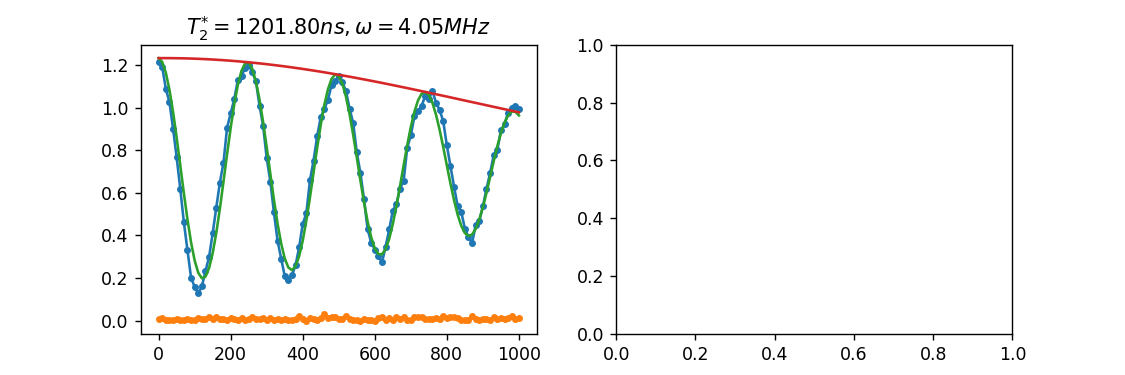

217508204.76314795


In [1105]:
q_target = q1
t_rabi = np.linspace(0,1000,101)
num = measure.qubitToread.index(q_target.q_name)
measure.qubits[q_target.q_name].replace(nwave=0,seqtype='PDD',detune=4e6)
pop = True
job = Job(mrw.fRamsey, (measure,t_rabi,[q_target.q_name],pop), tags=[q_target.q_name], max=len(t_rabi))
fall, sall = await job.done()
await cww.OffEx([q_target.q_name],measure)

x, y = fall[:,num], np.abs(sall[:,num])
res, func = op.T2_Fit(T1=30000,funcname='gauss',envelopemethod='hilbert').fitT2(x,np.abs(y))
A,B,T1,T2,w,phi = res.x
z = func(x,res.x)
z_env = A*np.exp(-(x/T2)**2-x/T1/2) + B
# w,yt,amp = op.RowToRipe().fourier(x,y)
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,3))
axes[0].plot(fall,np.abs(sall),'-o',markersize=3)
axes[0].plot(x,z)
axes[0].plot(x,z_env)
axes[0].set_title('$T_{2}^{*}=%.2fns,\omega=%.2fMHz$'%(T2,w*1e3))
# axes[1].plot(yt[yt!=0],np.abs(amp[yt!=0]))
plt.show()
q_target.alpha = q_target.alpha - (w*1e9-q_target.detune)
print(q_target.alpha)

In [1054]:
# q_target.alpha = q_target.alpha +2* (w*1e9-q_target.detune)

In [1059]:
q_target.alpha

255437109.77160367

# 比特能级差标定

## QRabi

In [1390]:
exstate=['q1']
zqubit = ['q6']
measure.qubits[exstate[0]].alphaq =measure.qubits[exstate[0]].f_ex-measure.qubits[zqubit[0]].f_ex
t_rabi = np.linspace(1,6000,100)
pop=True

job = Job(mrw.QRabi,(measure,t_rabi,exstate,pop), tags=exstate+zqubit, max=len(t_rabi))
fall, sall = await job.done()
await cww.OffEx(exstate,measure)
await cww.OffEx(zqubit,measure)

Output()

In [1172]:
measure.qubits[exstate[0]].pi_lenq = 1273.5e-9

## QRamsey

### 确定偏置找能级差

Output()

d:\qulab\qulab\yhs\optimize.py:264: RuntimeWarning: overflow encountered in exp
  return np.sum((A * np.exp(-T2*x**2-x*T1) + B - y)**2)
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
d:\qulab\qulab\yhs\optimize.py:264: RuntimeWarning: overflow encountered in square
  return np.sum((A * np.exp(-T2*x**2-x*T1) + B - y)**2)


(0.44512195121951215, 0.649524418146987, 30000, 19890.632732714617, 0.0039603960396039604, 0)


<IPython.core.display.Javascript object>


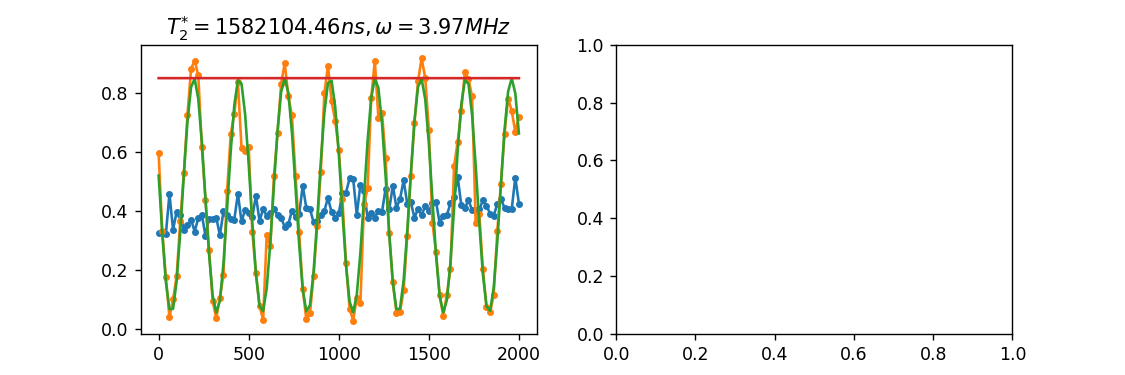

-889664245.7462884


In [1174]:
exstate=['q1']
zqubit = ['q6']
q_target = measure.qubits[exstate[0]]
t_rabi = np.linspace(0,2000,101)
num = measure.qubitToread.index(zqubit[0])
measure.qubits[q_target.q_name].replace(nwave=0,seqtype='PDD',detune=4e6)
pop = True
calimatrix=None
# zstate={zqubit[0]:0}
job = Job(mrw.QRamsey,(measure,t_rabi,exstate,zstate,pop,calimatrix), tags=exstate+zqubit, max=len(t_rabi))
fall, sall = await job.done()
await cww.OffEx(exstate,measure)
await cww.OffZ(zqubit,measure)

x, y = fall[:,num], np.abs(sall[:,num])
res, func = op.T2_Fit(T1=30000,funcname='gauss',envelopemethod='hilbert').fitT2(x,np.abs(y))
A,B,T1,T2,w,phi = res.x
z = func(x,res.x)
z_env = A*np.exp(-(x/T2)**2-x/T1/2) + B
# w,yt,amp = op.RowToRipe().fourier(x,y)
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,3))
axes[0].plot(fall,np.abs(sall),'-o',markersize=3)
axes[0].plot(x,z)
axes[0].plot(x,z_env)
axes[0].set_title('$T_{2}^{*}=%.2fns,\omega=%.2fMHz$'%(T2,w*1e3))
# axes[1].plot(yt[yt!=0],np.abs(amp[yt!=0]))
plt.show()
q_target.alphaq = q_target.alphaq - (w*1e9-q_target.detune)
print(q_target.alphaq)

In [1146]:
q_target.alphaq = q_target.alphaq -2* (w*1e9-q_target.detune)

In [1178]:
q_target.alphaq=-889664245.7462884

In [1184]:
q1.alphaq

-889664245.7462884

### 确定能级差找偏置

In [1282]:
w0 = 0.2       ##0.2GHz
# V_W = []
def search_Z(Z,w,w0,Z1,Z2,w1,w2):
    if w1<w<w0 or w1>w>w0:
        Z1 = Z.copy()
        w1 = w.copy()
    if  w0<w<w2 or w2>w>w0:
        Z2 = Z.copy()
        w2 = w.copy()
    z_v = (Z1+Z2)/2
    while w1<w0
    return z_v, Z1, Z2, w1, w2
    

In [1286]:
###Z偏置初步预测
qubit = q6
f_offset = -280e6
volt_ex, vtarget = dtl.biasshift(qubit.specfuncz,qubit.f_ex/1e9,f_offset/1e9,side='higher') 
volt_ex

0.38424063416246995

Output()

(0.4709639953542392, 0.1035663531804191, 30000, 89.60335102410279, 0.1990049751243781, 0)


d:\qulab\qulab\yhs\optimize.py:493: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-(x/T2)**2-x/T1/2)*np.cos(2*np.pi*w*x+phi) + B
d:\qulab\qulab\yhs\optimize.py:496: RuntimeWarning: overflow encountered in square
  return np.sum((self.func(x,para) - y)**2)


<IPython.core.display.Javascript object>


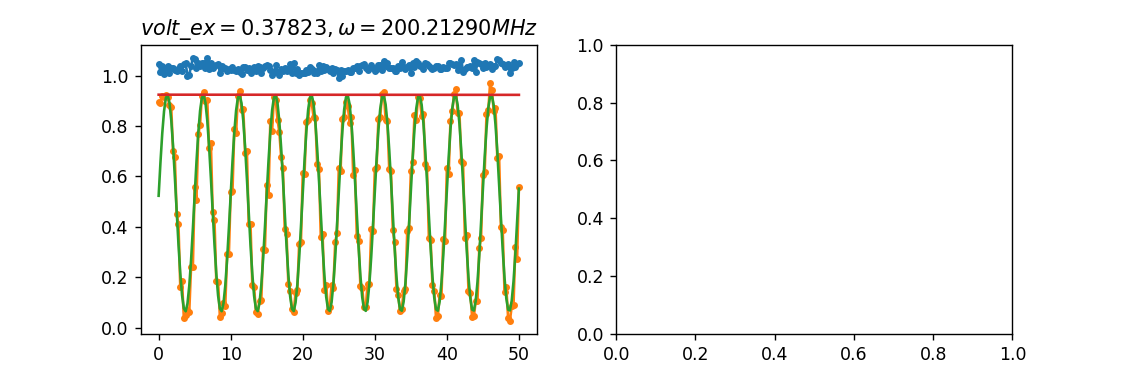

In [1324]:
exstate=['q1']
zqubit = ['q6']
q_target = measure.qubits[exstate[0]]
t_rabi = np.linspace(0,50,201)
num = measure.qubitToread.index(zqubit[0])
measure.qubits[q_target.q_name].replace(nwave=0,seqtype='PDD',detune=0e6)
pop = True
calimatrix=None

zstate={zqubit[0]:volt_ex}

job = Job(mrw.QRamsey,(measure,t_rabi,exstate,zstate,pop,calimatrix), tags=[q_target.q_name], max=len(t_rabi))
fall, sall = await job.done()
await cww.OffEx([q_target.q_name],measure)

x, y = fall[:,num], np.abs(sall[:,num])
res, func = op.T2_Fit(T1=30000,funcname='gauss',envelopemethod='hilbert').fitT2(x,np.abs(y))
A,B,T1,T2,w,phi = res.x
z = func(x,res.x)
z_env = A*np.exp(-(x/T2)**2-x/T1/2) + B
# w,yt,amp = op.RowToRipe().fourier(x,y)
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,3))
axes[0].plot(fall,np.abs(sall),'-o',markersize=3)
axes[0].plot(x,z)
axes[0].plot(x,z_env)
axes[0].set_title('$volt$_$ex=%.5f,\omega=%.5fMHz$'%(volt_ex,w*1e3))
plt.show()

In [1290]:
# 测定两组数据，确定扫描范围,此处只运行一次
# z1 = V_W[0][0]
# w1 = V_W[0][1]
# z2 = V_W[1][0]
# w2 = V_W[1][1]

In [1325]:
V_W.append([volt_ex,w])
V_W

[[0.3769100436425354, 0.19860112306227676],
 [0.38424063416246995, 0.20633412504712356],
 [0.38057533890250267, 0.20234339365127363],
 [0.378742691272519, 0.2004775469907174],
 [0.3778263674575272, 0.19940061034064802],
 [0.3782845293650231, 0.20001463030436462],
 [0.37805544841127514, 0.1997596393005818],
 [0.3781699888881491, 0.19974410534068066],
 [0.3781699888881491, 0.19996090636457392],
 [0.3782272591265861, 0.19980797866074693],
 [0.3782272591265861, 0.20021289972682388]]

In [1326]:
volt_ex,z1,z2,w1,w2 = search_Z(volt_ex,w,w0,z1,z2,w1,w2)
volt_ex,z1,z2,w1,w2

(0.3782272591265861,
 0.3781699888881491,
 0.3782845293650231,
 0.19996090636457392,
 0.20001463030436462)

In [1394]:
V_W=[[0.3769100436425354, 0.19860112306227676],
 [0.38424063416246995, 0.20633412504712356],
 [0.38057533890250267, 0.20234339365127363],
 [0.378742691272519, 0.2004775469907174],
 [0.3778263674575272, 0.19940061034064802],
 [0.3782845293650231, 0.20001463030436462],
 [0.37805544841127514, 0.1997596393005818],
 [0.3781699888881491, 0.19974410534068066],
 [0.3781699888881491, 0.19996090636457392],
 [0.3782272591265861, 0.19980797866074693],
 [0.3782272591265861, 0.20021289972682388],
 [0.3782272591265861, 0.1998365385261242]]

In [1329]:
volt_ex,z1,z2,w1,w2=(0.3782272591265861,
 0.3781699888881491,
 0.3782845293650231,
 0.19996090636457392,
 0.20001463030436462)

<IPython.core.display.Javascript object>


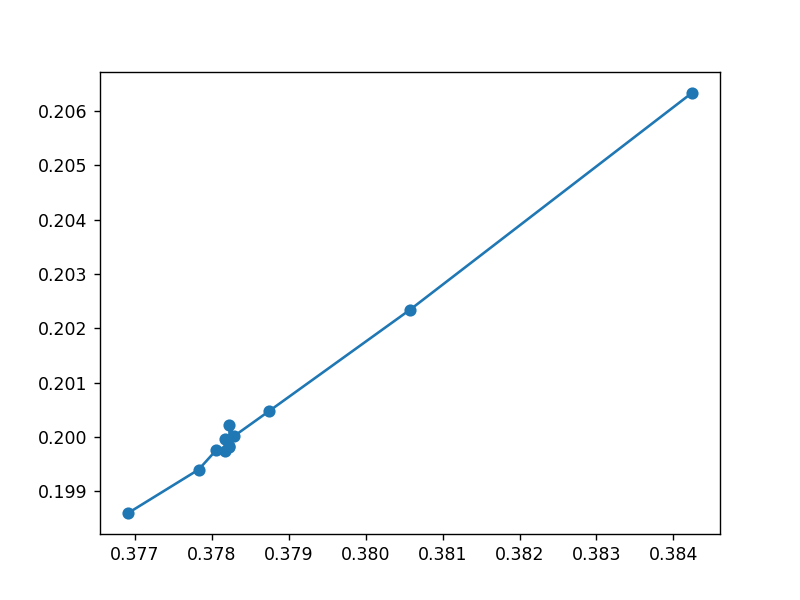

In [1395]:
plt.figure()
plt.plot(np.array(sorted(V_W))[:,0],np.array(sorted(V_W))[:,1],'-o')

### 确定范围后自动扫

In [1386]:
z1 = 0.3781699888881491
z2 = 0.3782845293650231
w1 = 0.19996090636457392
w2 = 0.20001463030436462

In [1383]:
{zqubit[0]:volt_ex}

{'q6': 0.3782272591265861}

In [1347]:
volt_ex,z1,z2,w1,w2=(0.3782272591265861,
 0.3781699888881491,
 0.3782845293650231,
 0.19996090636457392,
 0.20001463030436462)
zstate={zqubit[0]:volt_ex}

In [1384]:
for i in np.arange(2):
    exstate=['q1']
    zqubit = ['q6']
    q_target = measure.qubits[exstate[0]]
    t_rabi = np.linspace(0,50,201)
    num = measure.qubitToread.index(zqubit[0])
    measure.qubits[q_target.q_name].replace(nwave=0,seqtype='PDD',detune=0e6)
    pop = True
    calimatrix=None
    
    zstate[zqubit[0]]=volt_ex

    job = Job(mrw.QRamsey,(measure,t_rabi,exstate,zstate,pop,calimatrix), tags=[q_target.q_name], max=len(t_rabi))
    fall, sall = await job.done()
    await cww.OffEx([q_target.q_name],measure)

    x, y = fall[:,num], np.abs(sall[:,num])
    res, func = op.T2_Fit(T1=30000,funcname='gauss',envelopemethod='hilbert').fitT2(x,np.abs(y))
    A,B,T1,T2,w,phi = res.x
    z = func(x,res.x)
    z_env = A*np.exp(-(x/T2)**2-x/T1/2) + B
    
    V_W.append([zstate[zqubit[0]],w])
    np.savez(r'D:\skzhao\data\QRamsey\2%s.npz'%(''.join((exstate[0],'_',zqubit[0]))),data=V_W)
    zstate[zqubit[0]],z1,z2,w1,w2 = search_Z(zstate[zqubit[0]],w,w0,z1,z2,w1,w2)
    

Output()

d:\qulab\qulab\yhs\optimize.py:264: RuntimeWarning: overflow encountered in square
  return np.sum((A * np.exp(-T2*x**2-x*T1) + B - y)**2)
d:\qulab\qulab\yhs\optimize.py:264: RuntimeWarning: overflow encountered in exp
  return np.sum((A * np.exp(-T2*x**2-x*T1) + B - y)**2)


(0.08110465116279067, 0.1168986305102282, 30000, 0.8394481972321048, 0.01990049751243781, 0)


d:\qulab\qulab\yhs\optimize.py:496: RuntimeWarning: overflow encountered in square
  return np.sum((self.func(x,para) - y)**2)


UnboundLocalError: local variable 'z1' referenced before assignment

In [1387]:
search_Z(zstate[zqubit[0]],w,w0,z1,z2,w1,w2)

(0.3782272591265861,
 0.3781699888881491,
 0.3782845293650231,
 0.19996090636457392,
 0.20001463030436462)

In [1337]:
V_W

[[0.3769100436425354, 0.19860112306227676],
 [0.38424063416246995, 0.20633412504712356],
 [0.38057533890250267, 0.20234339365127363],
 [0.378742691272519, 0.2004775469907174],
 [0.3778263674575272, 0.19940061034064802],
 [0.3782845293650231, 0.20001463030436462],
 [0.37805544841127514, 0.1997596393005818],
 [0.3781699888881491, 0.19974410534068066],
 [0.3781699888881491, 0.19996090636457392],
 [0.3782272591265861, 0.19980797866074693],
 [0.3782272591265861, 0.20021289972682388],
 [0.3782272591265861, 0.1998365385261242]]

In [1380]:
V_W

[[0.3769100436425354, 0.19860112306227676],
 [0.38424063416246995, 0.20633412504712356],
 [0.38057533890250267, 0.20234339365127363],
 [0.378742691272519, 0.2004775469907174],
 [0.3778263674575272, 0.19940061034064802],
 [0.3782845293650231, 0.20001463030436462],
 [0.37805544841127514, 0.1997596393005818],
 [0.3781699888881491, 0.19974410534068066],
 [0.3781699888881491, 0.19996090636457392],
 [0.3782272591265861, 0.19980797866074693],
 [0.3782272591265861, 0.20021289972682388],
 [0.3782272591265861, 0.1998365385261242]]

# 临界判断

In [1389]:
measure.readamp = [0.045,0.08,0.2,0.23,0.05,0.04,0.049,0.035,0.035,0.04][:]
measure.ringup = [200,100,100,100,100,100,100,100,100,200][:]
measure.ringupamp = [0.3,0.3,0.2,0.2]
await cww.modulation_read(measure,measure.delta,readlen=2000,repeats=500)

Output()

<IPython.core.display.Javascript object>


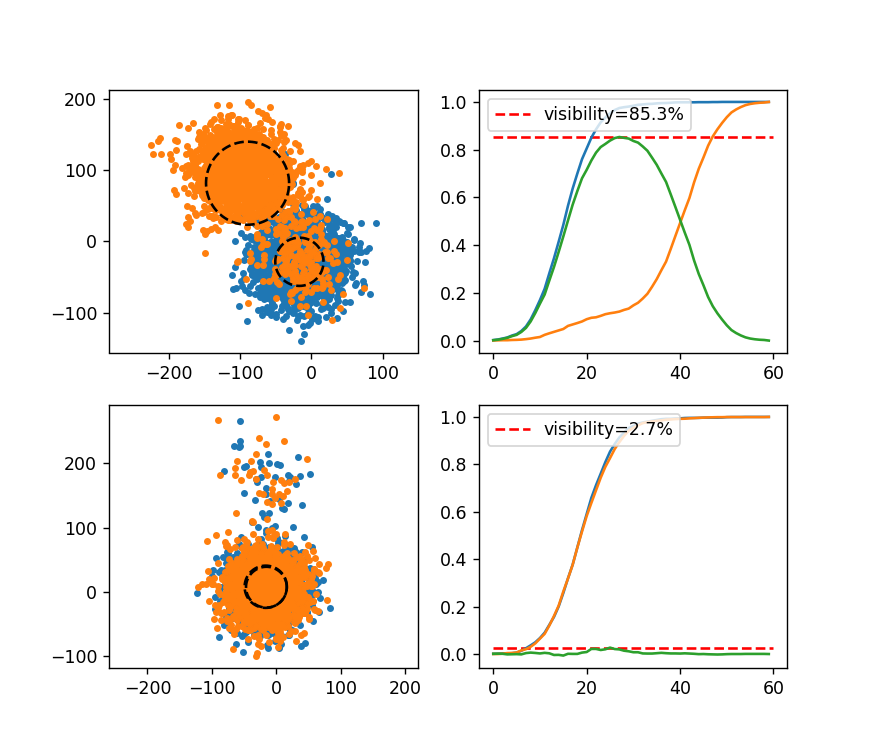

<IPython.core.display.Javascript object>


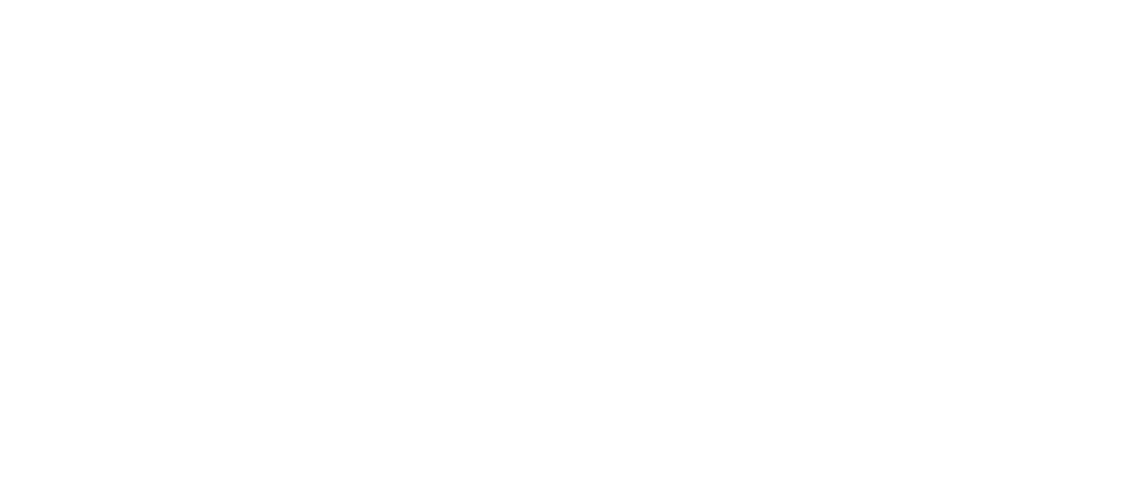

0.44575


<IPython.core.display.Javascript object>


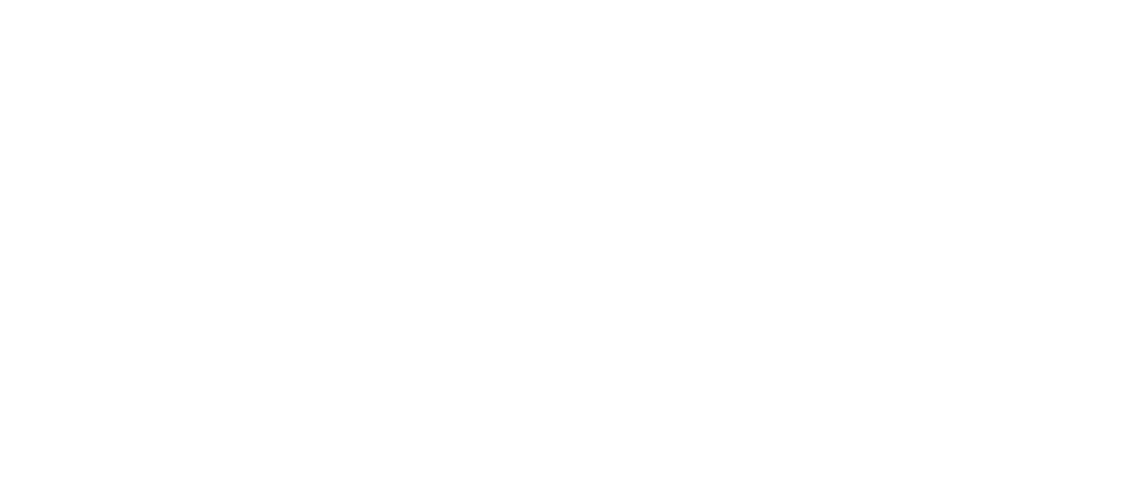

<IPython.core.display.Javascript object>


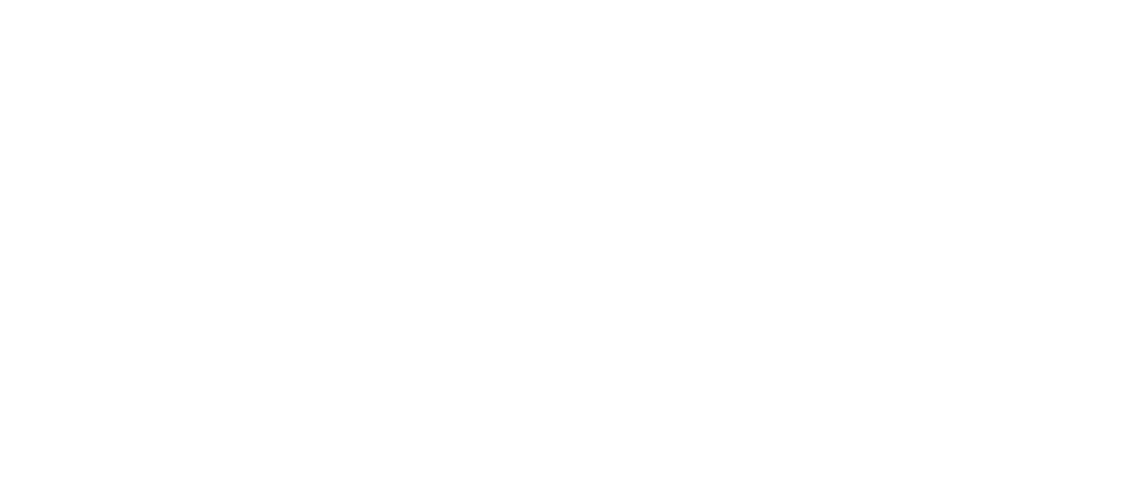

Output()

<IPython.core.display.Javascript object>


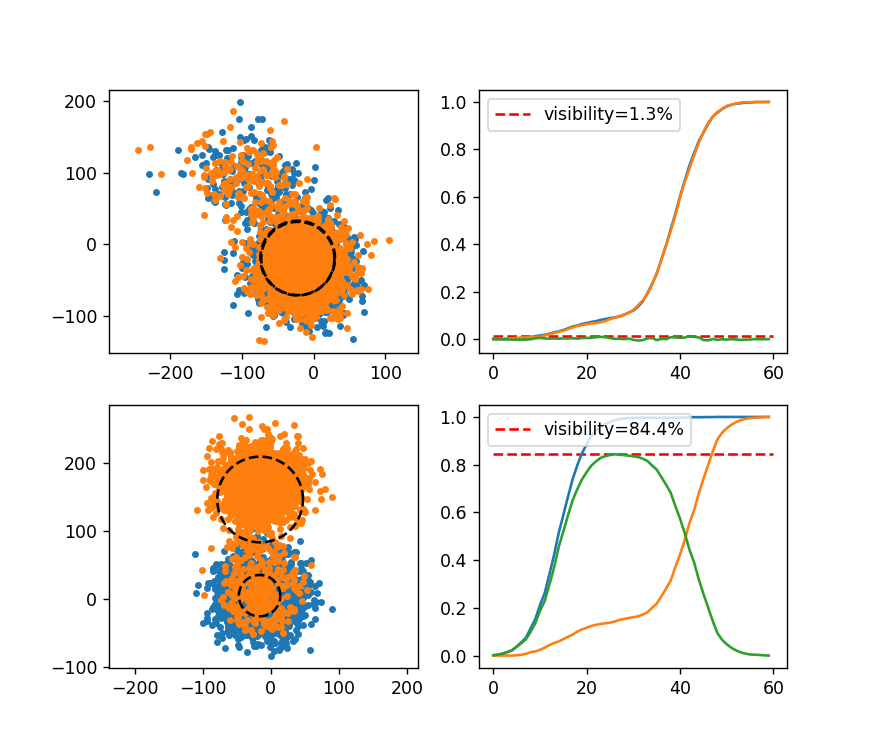

<IPython.core.display.Javascript object>


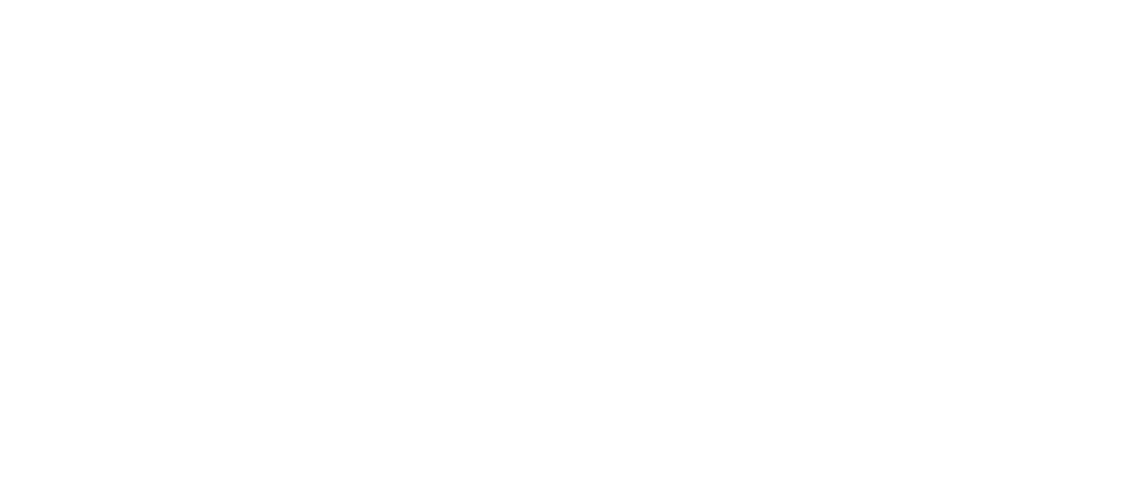

0.42575


<IPython.core.display.Javascript object>


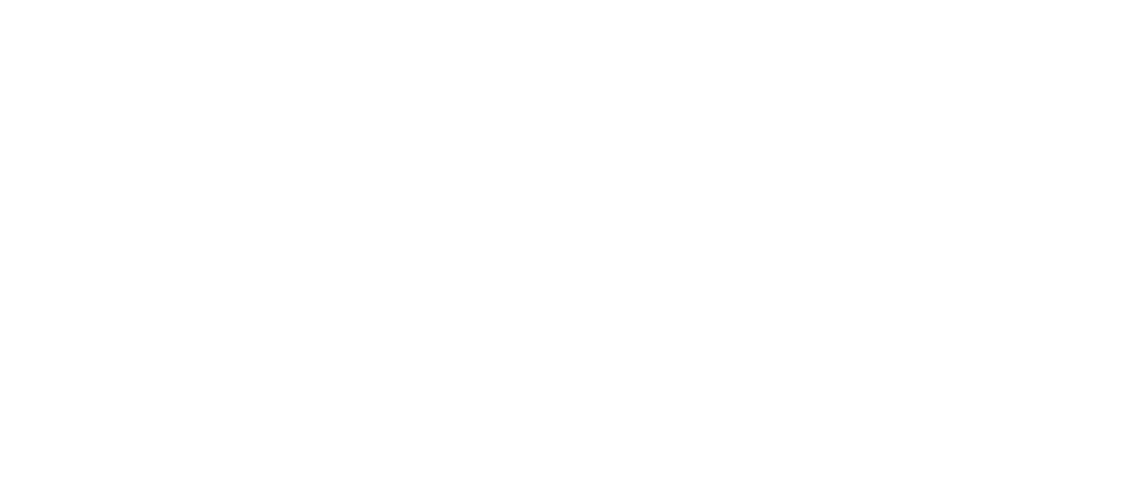

<IPython.core.display.Javascript object>


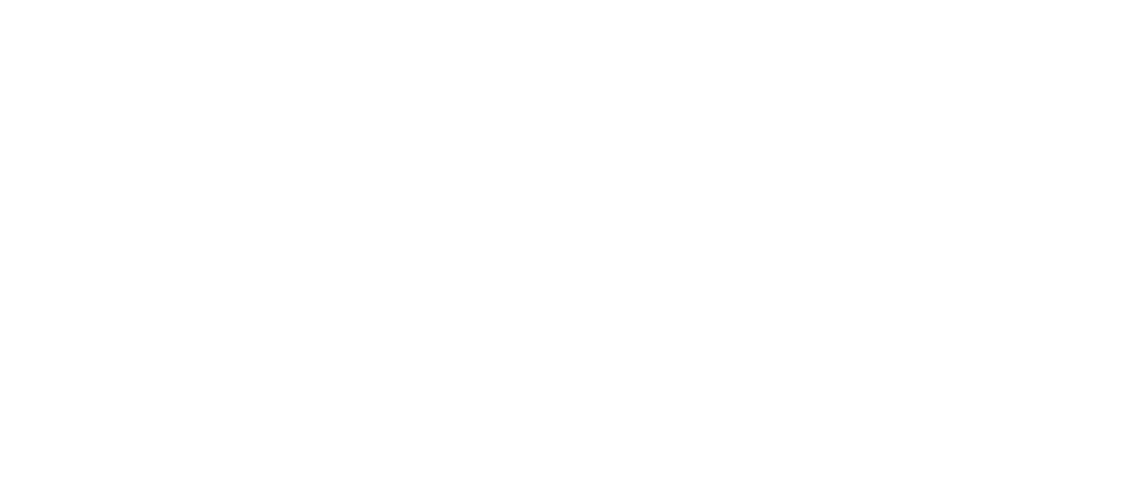

In [1396]:
bits = [q1,q6]
# await cww.RecoverInst(measure,state)
for qnum,q in enumerate(bits):
    q_target = [q.q_name]
    # await measure.attinst['com8'].set_att(29)
#     await mrw.jpa_switch(measure,'ON')
    job = Job(mrw.threshHold, (measure,q_target), tags=q_target, max=3)
    st, s_st = await job.done()
    await cww.OffEx(q_target,measure)

    num = measure.n
    fig, axes = plt.subplots(ncols=2,nrows=num,figsize=(7,3*num))
    for i in range(measure.n):
        s_off, s_on= s_st[0,:,i], s_st[1,:,i]
        data = await mrw.visibility(1,s_off,s_on)
        ax0 = axes[i][0] if num>1 else axes[i]
        ax0.plot(np.real(s_off),np.imag(s_off),'.')
        ax0.plot(np.real(s_on),np.imag(s_on),'.',alpha=1)
    #     if np.shape(s_st)[0] == 3:
    #         ax0.plot(np.real(s_on2),np.imag(s_on2),'.',alpha=0.6)
    #     ax0.plot(np.real(s_on2),np.imag(s_on2),'.',alpha=0.6)
        ax0.plot(*(data[0][3]),'k--')
        ax0.plot(*(data[0][4]),'k--')
        ax0.axis('equal')
        ax1 = axes[i][1] if num>1 else axes[i+1]
        for j in data[0][:3]:
            ax1.plot(j)
        maxdata = np.max(data[0][2])
        ax1.hlines(maxdata,0,60,'r','--',label=f'visibility={round(maxdata*100,1)}%')
        ax1.legend(loc='upper left')
    #     ax1.vlines([0],10,-100)
    #     ax1.hlines([0],-10,100)

    plt.show()
#     num = eval(q_target[0][1:])-1
    num=measure.qubitToread.index(q.q_name)
#     para0, para1 = await dtl.find_circle(measure,s_st,num)
    dtl.classify(measure,s_st,target=num,predictexe=True,n_cluster=2)

In [54]:
ax0.plot(np.real(s_on),np.imag(s_on),'.',alpha=1)

# AllXY

In [ ]:
# 这个在找读出点之前测，他测的是电压，不需要分类

Output()

<IPython.core.display.Javascript object>


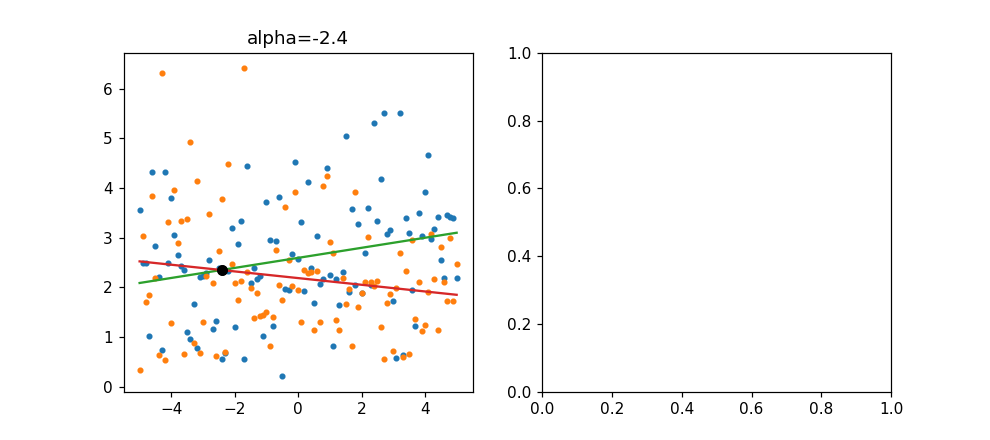

In [178]:
q_target = q1
which = 1
#alpha = q_target.alpha
#await psg[q_target.inst['ex_lo']].setValue('Frequency',(q_target.f_ex+q_target.delta_ex))
job = Job(mrw.AllXYdragdetune, (measure,which,[q_target.q_name]), tags=[q_target.q_name], max=102)
fall, sall = await job.done()

fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
l = np.shape(fall)[0]//2
# f1, f2, s1, s2 = fall[:l,0], fall[l:,0], np.abs(sall[:l,0]), np.abs(sall[l:,0])
f1, f2, s1, s2 = fall[:l,0], fall[l:,0], np.abs(sall[:l,1]), np.abs(sall[l:,1])
z1 = np.poly1d(np.polyfit(f1,s1,1))(f1)
z2 = np.poly1d(np.polyfit(f2,s2,1))(f2)
index = np.argmin(np.abs(z1-z2))
axes[0].plot(np.array([f1,f2]).T,np.array([s1,s2]).T,'.')
axes[0].plot(np.array([f1,f2]).T,np.array([z1,z2]).T)
# axes[0].plot(fall[l:,:],np.abs(sall[l:,:]))
axes[0].plot([f1[index],f2[index]],[z1[index],z2[index]],'ko')
axes[0].set_title(f'alpha={round(f1[index],3)}')
plt.show()

In [1112]:
q1.DRAGScaling =0.233/(q1.alpha*2*np.pi)

In [1109]:
q6.DRAGScaling =-1.2/(q2.alpha*2*np.pi)

# 优化dragg因子

In [ ]:
# 这个需要分类，他和AllXY效果一致

In [1111]:
bit = [q1]
rang = 1
# await cww.RecoverInst(measure, state)
# await measure.psg['psg_ex1'].setValue('Moutput','OFF')
for i in bit:
    q_target = i
    job = Job(mrw.optDragalpha, (measure,[q_target.q_name],rang), tags=[q_target.q_name], max=61)
    f, pop = await job.done()
    await cww.OffEx([q_target.q_name],measure)
#     clear_output()

Output()

# AllXY_kind

In [370]:
bit = [q1,q2]
auxqubit = None
# await cww.RecoverInst(measure, state)
# await psg_ex1.setValue('Moutput','OFF')
for i in bit:
    q_target = i
    job = Job(mrw.AllXY_kind, (measure,auxqubit,[q_target.q_name]), tags=[q_target.q_name],auto_save=True, max=21)
    f, pop = await job.done()
    await cww.OffEx([q_target.q_name],measure)
#     clear_output()

Output()

Output()

# RB

In [146]:
bit = [q1]
# await psg_ex1.setValue('Moutput','OFF')
mlist, len_data, gate = np.logspace(0.4,2.7,16,dtype=int), 30,[False]#[False,'2','3','4','5','6','7']
for i, j in enumerate(bit):
    q_target = j.q_name
    print(q_target)
    for k in gate:
        job = Job(mrw.RB_waveform,(measure,mlist,len_data,k,[q_target]),tags=[q_target,str(k)],no_bar=True,auto_save=True)
        n_RBw, pop_RBw = await job.done()
    await cww.OffEx([q_target.q_name],measure)
#     clear_output()

q1


Output()

# T1_2d

In [1408]:
t_rabi = np.linspace(0,42000,201)
v_rabi = np.linspace(-0.8,0.8,101)
dcstate1 = {'q6':-0}# None
exstate = ['q1']#rabi
mat=None
popRead=False
job = Job(mrw.T1_2d,(measure,t_rabi,v_rabi,dcstate1,exstate,popRead,mat),title='T1_2d',tags=(exstate),auto_save=True,max=len(v_rabi))
v, t, s = await job.done()
await cww.OffEx(exstate,measure)
await cww.OffZ(exstate+list(dcstate1.keys()),measure)

Output()

TypeError: 'list' object is not callable

In [ ]:
t_rabi = np.linspace(0,42000,201)
v_rabi = np.linspace(-0.8,0.8,101)
dcstate1 = {'q1':-0}# None
exstate = ['q6']#rabi
mat=None
popRead=False
job = Job(mrw.T1_2d,(measure,t_rabi,v_rabi,dcstate1,exstate,popRead,mat),title='T1_2d',tags=(exstate),auto_save=True,max=len(v_rabi))
v, t, s = await job.done()
await cww.OffEx(exstate,measure)
await cww.OffZ(exstate+list(dcstate1.keys()),measure)

# 真空拉比

In [444]:
t_rabi = np.linspace(0,100,101)
v_rabi = np.linspace(0.16,0.19,31)
dcstate = {'q1':-0.2} #None
exstate = ['q2']#rabi
mat=None
job = Job(mrw.T1_2d,(measure,t_rabi,v_rabi,dcstate,exstate,True,mat),title='vRabi',tags=(exstate+[str(dcstate)]),auto_save=True,max=len(v_rabi))
v, t, s = await job.done()

Output()

# Crosstalk

In [50]:
bitss = ['q1','q2','q3','q4','q5','q6','q7','q8','q9','q10']
f_cross = []
for i in bitss:
    f_cross.append(measure.qubits[i].f_cross)

In [42]:
q4.f_cross=4.291e9

In [43]:
bitss = ['q4']
measure.repeats = 500
for j,i in enumerate(bitss):
    exstate = [i]
    print(i)
    dcstate = {}
    dcstate = {i: round(measure.qubits[i].T_bias[1]+measure.qubits[i].T_bias[0]/2,3) for i in measure.qubits}  ###all bits 偏到能谱底部
    dcstate[exstate[0]] = round(measure.qubits[exstate[0]].T_bias[1]+measure.qubits[exstate[0]].T_bias[0]*0.245,3)  ###目标比特偏到斜率最大处
    await mrw.dcManage(measure,dcstate=dcstate,readstate=exstate,calimatrix=None,qnum=10)   ####只读目标比特
    
    freq = np.arange(-0.3,0.3,0.001)*1e9+measure.qubits[exstate[0]].f_cross
    job = Job(mrw.singlespec, (measure,freq,True,measure.f_lo,True,exstate), tags=exstate,auto_save=True, max=len(freq))
    f_ss, s_ss = await job.done()
    index = np.abs(s_ss).argmax(axis=0)
    f_rabi = np.array([f_ss[:,i][j] for i, j in enumerate(index)])
    measure.qubits[exstate[0]].f_cross=f_rabi[0]
    measure.qubits[exstate[0]].f_lo=measure.f_lo

await mrw.dcManage(measure,dcstate={},readstate=exstate,calimatrix=None,qnum=10)
await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=None)

q4


Output()

In [51]:
f_cross == [4499000000.0,
 4959000000.0,
 4501000000.0,
 4325000000.0,
 4368000000.0,
 4539000000.0,
 4578000000.0,
 4931000000.0,
 4514000000.0,
 4960000000.0]

True

In [52]:
bias = [0.24,0.25,0.25,0.245,0.25,0.25,0.235,0.23,0.23,0.24]

for k,q in enumerate(['q1','q2','q3','q4','q5','q6','q7','q8','q9','q10']):
    exstate = [q]
    dcstate_b = {i: round(measure.qubits[i].T_bias[1]+measure.qubits[i].T_bias[0]/2,3) for i in measure.qubits}  ###all bits 偏到能谱底部
    dcstate_b[exstate[0]] = round(measure.qubits[exstate[0]].T_bias[1]+measure.qubits[exstate[0]].T_bias[0]*bias[k],3)  ###目标比特偏到0.233磁通量子处
    await mrw.dcManage(measure,dcstate=dcstate_b,readstate=exstate,calimatrix=None,qnum=10) 
    q_target =measure.qubits[exstate[0]]
    f_lo, delta, n, f_res,base,f_s21, s_s21 = await mrw.again(q_target,measure,False,measure.f_lo)
    exbias = np.linspace(-0.004,0.004,21)
    dcbias = np.linspace(-0.4,0.4,101)
    bits = ['q1','q2','q3','q4','q5','q6','q7','q8','q9','q10']
    for i in bits:
        if exstate[0]!=i:
            dcstate = [i]
            print(exstate+dcstate)
            job = Job(mrw.Crosstalk,(measure,exstate,dcstate,exbias,dcbias),tags=(exstate+dcstate),auto_save=True,max=len(dcbias))
            v_c, v_b, s_cr = await job.done()
            np.savez(r'D:\skzhao\data\crosstalk\2%s.npz'%(''.join((exstate[0],'_',dcstate[0]))),V_ex=v_c, V_dc=v_b, data=s_cr)
            await cww.OffZ(dcstate+exstate,measure)
            await cww.OffEx(exstate,measure)

    await mrw.dcManage(measure,dcstate={},readstate=exstate,calimatrix=None,qnum=10)
    await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=None)

Output()

['q1', 'q2']


Output()

['q1', 'q3']


Output()

['q1', 'q4']


Output()

['q1', 'q5']


Output()

['q1', 'q6']


Output()

['q1', 'q7']


Output()

['q1', 'q8']


Output()

['q1', 'q9']


Output()

['q1', 'q10']


Output()

Output()

['q2', 'q1']


Output()

['q2', 'q3']


Output()

['q2', 'q4']


Output()

['q2', 'q5']


Output()

['q2', 'q6']


Output()

['q2', 'q7']


Output()

['q2', 'q8']


Output()

['q2', 'q9']


Output()

['q2', 'q10']


Output()

Output()

['q3', 'q1']


Output()

['q3', 'q2']


Output()

['q3', 'q4']


Output()

['q3', 'q5']


Output()

['q3', 'q6']


Output()

['q3', 'q7']


Output()

['q3', 'q8']


Output()

['q3', 'q9']


Output()

['q3', 'q10']


Output()

Output()

['q4', 'q1']


Output()

['q4', 'q2']


Output()

['q4', 'q3']


Output()

['q4', 'q5']


Output()

['q4', 'q6']


Output()

['q4', 'q7']


Output()

['q4', 'q8']


Output()

['q4', 'q9']


Output()

['q4', 'q10']


Output()

Output()

['q5', 'q1']


Output()

['q5', 'q2']


Output()

['q5', 'q3']


Output()

['q5', 'q4']


Output()

['q5', 'q6']


Output()

['q5', 'q7']


Output()

['q5', 'q8']


Output()

['q5', 'q9']


Output()

['q5', 'q10']


Output()

Output()

['q6', 'q1']


Output()

['q6', 'q2']


Output()

['q6', 'q3']


Output()

['q6', 'q4']


Output()

['q6', 'q5']


Output()

['q6', 'q7']


Output()

['q6', 'q8']


Output()

['q6', 'q9']


Output()

['q6', 'q10']


Output()

Output()

['q7', 'q1']


Output()

['q7', 'q2']


Output()

['q7', 'q3']


Output()

['q7', 'q4']


Output()

['q7', 'q5']


Output()

['q7', 'q6']


Output()

['q7', 'q8']


Output()

['q7', 'q9']


Output()

['q7', 'q10']


Output()

Output()

['q8', 'q1']


Output()

['q8', 'q2']


Output()

['q8', 'q3']


Output()

['q8', 'q4']


Output()

['q8', 'q5']


Output()

['q8', 'q6']


Output()

['q8', 'q7']


Output()

['q8', 'q9']


Output()

['q8', 'q10']


Output()

Output()

['q9', 'q1']


Output()

['q9', 'q2']


Output()

['q9', 'q3']


Output()

['q9', 'q4']


Output()

['q9', 'q5']


Output()

['q9', 'q6']


Output()

['q9', 'q7']


Output()

['q9', 'q8']


Output()

['q9', 'q10']


Output()

Output()

['q10', 'q1']


Output()

['q10', 'q2']


Output()

['q10', 'q3']


Output()

['q10', 'q4']


Output()

['q10', 'q5']


Output()

['q10', 'q6']


Output()

['q10', 'q7']


Output()

['q10', 'q8']


Output()

['q10', 'q9']


Output()

In [53]:
await mrw.dcManage(measure,dcstate={},readstate=exstate,calimatrix=None,qnum=10)
await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=None)

In [79]:
measure.repeats=500

# 二维谱

## 直流

In [22]:
measure.repeats = 500

In [24]:
freq = np.arange(4.5,6.0,0.001)*1e9
bits = [q3]
for k, i in enumerate(bits):
#     await mrw.jpa_switch(measure,'ON')
    print(i.q_name)
    readstate = None
    job = Job(mrw.spec2d, (i,measure,freq,None,False,readstate), tags=[i.q_name],auto_save=True, max=32)
    v_s2, f_s2, s_s2 = await job.done()
    await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=None)
# await measure.psg['psg_ex1'].setValue('Power',24)

q2


Output()

NameError: name 'qubit' is not defined

In [802]:
bits = ['q1','q2','q3','q4','q5','q6','q7','q8','q9','q10']
await cww.OffZ(bits,measure)
await cww.OffEx(bits,measure)
await mrw.dcManage(measure,dcstate={},readstate=None,calimatrix=None,qnum=10)
bits = [q7,q8,q9,q10]
for k, i in enumerate(bits):
    await measure.psg[i.inst['ex_lo']].setValue('Power',0)
#     await mrw.jpa_switch(measure,'ON')
    print(i.q_name)
    readstate = ['q1','q2']
    job = Job(mrw.spec2d, (i,measure,freq,None,False,readstate), tags=[i.q_name],auto_save=True, max=32)
    v_s2, f_s2, s_s2 = await job.done()
    await cww.InitInst(measure,psgdc=True,awgch=True,clearwaveseq=None)
    await measure.psg[i.inst['ex_lo']].setValue('Power',24)
await mrw.dcManage(measure,dcstate={},readstate=None,calimatrix=None,qnum=10)

q7


Output()

q8


Output()

q9


Output()

q10


Output()

In [74]:
I= [0, 1299]
I[0:1]

[0]

## Zpulse

In [1149]:
current = np.linspace(-0.8,0.8,41)
freq = np.arange(4.4,5.4,0.001)*1e9
qubit = q1

readstate = ['q1','q2']
job = Job(mrw.spec2d_awg, (qubit,measure,current,freq,calimatrix,False,readstate), tags=[qubit.q_name],auto_save=True, max=len(current))
v_s2, f_s2, s_s2 = await job.done()

Output()

In [33]:
measure.repeats = 500
current = np.linspace(-0.8,0.8,41)
qubits = [q7]
for i in qubits:
    print(i.q_name)
    job = Job(mrw.spec2d_awg2, (i,measure,current,None,False), tags=[i.q_name],auto_save=True, max=len(current))
    v_s2, f_s2, s_s2 = await job.done()
    

q7


Output()

In [34]:
measure.repeats = 500
current = np.linspace(-0.8,0.8,41)
qubits = [q7,q8,q9,q10]
for i in qubits:
    print(i.q_name)
    job = Job(mrw.spec2d_awg2, (i,measure,current,None,False), tags=[i.q_name],auto_save=True, max=len(current))
    v_s2, f_s2, s_s2 = await job.done()
    

q7


Output()

q8


Output()

q9


Output()

q10


Output()

In [35]:
await mrw.dcManage(measure,dcstate={},readstate=['q1','q2'],calimatrix=None,qnum=10)

# 坠饰态

In [ ]:
 spec2d_dress(qubit,measure,current,freq,f_target,modulation=False)

In [502]:
current = np.linspace(-0.8,0.8,4)
freq = np.arange(4.9,5.96,0.001)*1e9
qubit = q2
f_target = q2.f_ex

readstate = ['q1','q2']
job = Job(mrw.spec2d_dress, (qubit,measure,current,freq,f_target,False), tags=[qubit.q_name],auto_save=False, max=len(current))
v_s2, f_s2, s_s2 = await job.done()

Output()

TypeError: cannot unpack non-iterable NoneType object

# 时序

## XYZtiming

In [485]:
await cww.modulation_read(measure,delta,readlen=2000,repeats=1000)

In [212]:
q2.timing={'read>xy': 0, 'z>xy': 0}

Output()

<IPython.core.display.Javascript object>


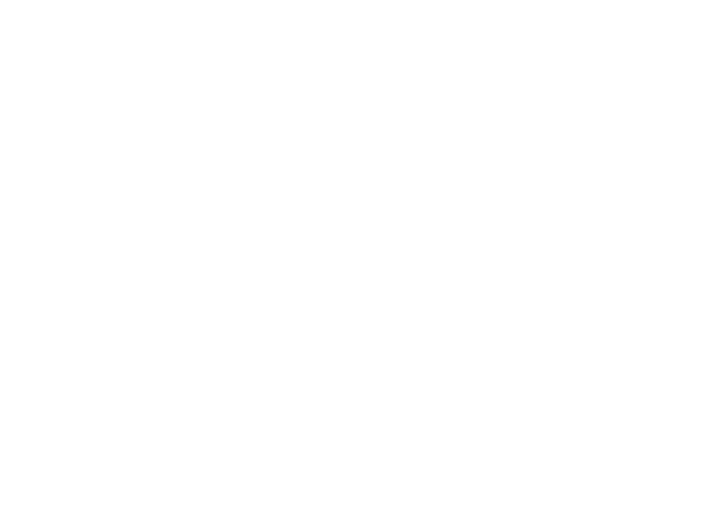

(15.0, 13.0, 3008.0, 2983.0, 0.6399913489771822, 0.8324163895941231)
(15.0, 13.0, 3008.0, 2983.0, -0.6399913489771822, 0.8324163895941231)
(15.0, 13.0, 3008.0, 2983.0, -0.6399913489771822, 0.8189241927643368)
(15.0, 13.0, 3008.0, 2983.0, 0.6399913489771822, 0.8189241927643368)
(15.0, 13.0, 3008.0, 2983.0, 0.6399913489771822, 0.800676510644588)
(15.0, 13.0, 3008.0, 2983.0, -0.6399913489771822, 0.800676510644588)


Output()

<IPython.core.display.Javascript object>


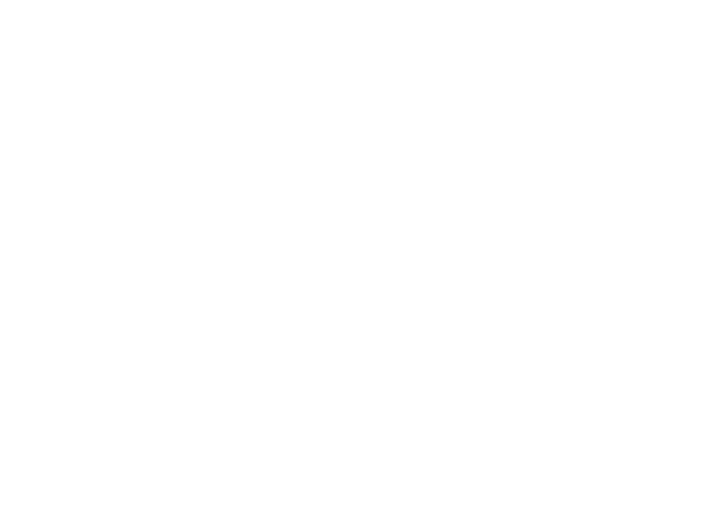

(13.0, 13.0, 3010.0, 2982.0, 0.5975220895750784, 0.5098747177111331)
(13.0, 13.0, 3010.0, 2982.0, -0.5975220895750784, 0.5098747177111331)
(13.0, 13.0, 3010.0, 2982.0, -0.5975220895750784, 0.5006590391712173)
(13.0, 13.0, 3010.0, 2982.0, 0.5975220895750784, 0.5006590391712173)
(13.0, 13.0, 3010.0, 2982.0, 0.5975220895750784, 0.4820662189946218)
(13.0, 13.0, 3010.0, 2982.0, -0.5975220895750784, 0.4820662189946218)


In [213]:
bits = [q1,q2]
# await cww.RecoverInst(measure, state)
# await psg_ex1.setValue('Moutput','ON')
for i in bits:
    q_target = i
    q_target.timing['z>xy']=0
    processlist = [mrw.XYZ_timing]
    para = {'t_rabi': np.linspace(2900,3100,201),'exstate':[q_target.q_name],'calimatrix':None,'pop':True}
    paraslist = [para]
    maxlist = [len(para['t_rabi'])]
    update_state = [False]
    whichexe = [0]
    saveQubitstate = [False]
    await mrw.dispatcher(measure,whichexe,processlist,paraslist,tags=[q_target.q_name],\
                         maxlist=maxlist,update_state=update_state)
    await cww.OffEx([q_target.q_name],measure)
    await cww.OffZ([q_target.q_name],measure)

In [148]:
t_timing = np.linspace(2800,3400,101)
q_target = ['q1']
calimatrix = None

job = Job(mrw.XYZ_timing,(measure,t_timing,q_target,calimatrix,True),tags=q_target,auto_save=True,max=len(t_timing))
t_timing, s_timing = await job.done()
await cww.OffEx(q_target,measure)
await cww.OffZ(q_target,measure)


Output()

## qqtiming

Output()

<IPython.core.display.Javascript object>


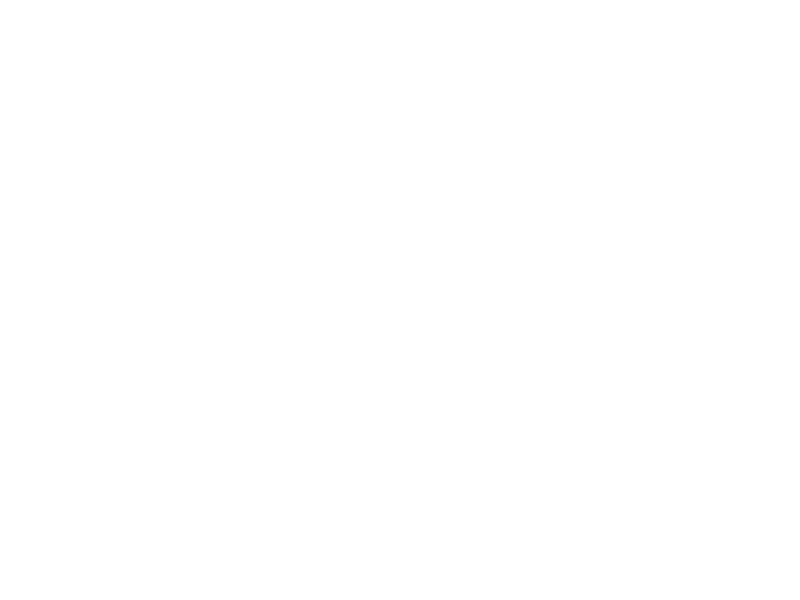

(10.0, 9.0, 1000.0, 972.0, 0.3791581121670292, 0.5424822093197638)
(10.0, 9.0, 1000.0, 972.0, -0.3791581121670292, 0.5424822093197638)
(10.0, 9.0, 1000.0, 972.0, -0.3762005527870036, 0.53044820712038)
(10.0, 9.0, 1000.0, 972.0, 0.3762005527870036, 0.53044820712038)
(10.0, 9.0, 1000.0, 972.0, 0.3762005527870036, 0.5151608279849944)
(10.0, 9.0, 1000.0, 972.0, -0.3762005527870036, 0.5151608279849944)
(90.0, 45.0, 1100.0, 900.0, 0.4495353850864375, 0.35281699898001107)
(90.0, 45.0, 1100.0, 900.0, -0.4495353850864375, 0.35281699898001107)
(55.0, 42.0, 1100.0, 933.0, 0.4495353850864375, 0.35859243266231416)
(55.0, 42.0, 1100.0, 933.0, -0.4495353850864375, 0.35859243266231416)
(55.0, 42.0, 1066.0, 933.0, 0.4495353850864375, 0.3740824434286858)
(55.0, 42.0, 1066.0, 933.0, -0.4495353850864375, 0.3740824434286858)


In [505]:
bits = [q1]

# await cww.RecoverInst(measure, state)
# await psg_ex1.setValue('Moutput','ON')
for i in bits:
    qubit_ex = i
    qubit_z = measure.qubits[measure.qubitToread[i.index+1]]
    processlist = [mrw.qqTiming]
    para = {'t_rabi': np.linspace(900,1100,201),'exstate':[qubit_ex.q_name],'dcstate':[qubit_z.q_name],'calimatrix':None,'volt':None,'pop':True}
    paraslist = [para]
    maxlist = [len(para['t_rabi'])]
    update_state = [False]
    whichexe = [0]
    saveQubitstate = [False]
    await mrw.dispatcher(measure,whichexe,processlist,paraslist,tags=[qubit_ex.q_name,qubit_z.q_name],\
                         maxlist=maxlist,update_state=update_state)
    await cww.OffEx([qubit_ex.q_name],measure)
    await cww.OffZ([qubit_ex.q_name,qubit_z.q_name],measure)

In [474]:
qq_timing = np.linspace(900,1100,201)
calimatrix = None
exstate=['q1']
dcstate=['q2']
V_swap = None## [-0.2,0.164]
job = Job(mrw.qqTiming,(measure,qq_timing,exstate,dcstate,None,V_swap,True),tags=(exstate+dcstate),auto_save=False,max=len(qq_timing))
qt_timing, qs_timing = await job.done()
await cww.OffEx(exstate,measure)
await cww.OffZ(exstate+dcstate,measure)

Output()

<IPython.core.display.Javascript object>


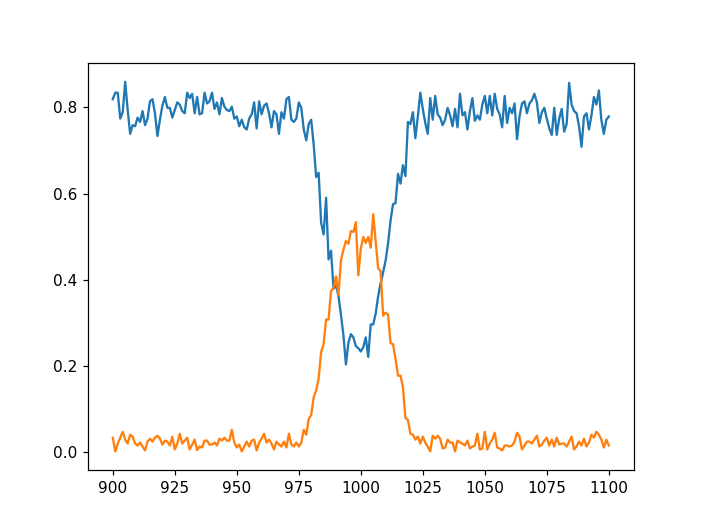

In [475]:
plt.figure()
plt.plot(qt_timing[:,0], abs(qs_timing)[:,0])
plt.plot(qt_timing[:,0], abs(qs_timing)[:,1])

# z_pop

In [249]:
height=0.8
q_target = ['q1']
volt_list = np.arange(-0.06,0.06,0.008)
job = Job(mrw.singleZ,(measure,volt_list,height,q_target),tags=q_target,auto_save=False,max=len(volt_list))
t_sz, s_sz = await job.done()

Output()

In [247]:
measure.repeats =500

In [248]:
height=0.8
q_target = ['q1']
t_end = 5000-measure.qubits[q_target[0]].pi_len*measure.qubits[q_target[0]].envelopename[1]/2e-9 +10
t_rabi = np.append(np.arange(2000,4900,5),np.arange(4900,t_end,1))
# t_rabi = np.linspace(min(t_rabi),max(t_rabi),10)
job = Job(mrw.zPulse_pop,(measure,t_rabi,height,q_target),tags=q_target,auto_save=True,max=len(t_rabi))
t_z, v_z, p_z = await job.done()

await cww.OffEx(q_target,measure)
await cww.OffZ(q_target,measure)

Output()

# iswap

## iswap_optzpa_pop

In [1019]:
dcstate, exstate = ['q1'], ['q6']
for i in dcstate+exstate:
    measure.qubits[i].gateduring = 10e-9
    measure.qubits[i].volt_zgate = 0
    measure.qubits[i].volt_zgate_b = 0
    measure.qubits[i].virtualPhase = 0
    measure.qubits[i].coordinatePhase = 0
    measure.qubits[i].during_swap = 25e-9
    measure.qubits[i].volt_swap = 0

q_Ex = measure.qubits[exstate[0]]
q_Dc = measure.qubits[dcstate[0]]
volt_ex, vtarget = dtl.biasshift(q_Ex.specfuncz,q_Ex.f_ex/1e9,(q_Dc.f_ex-q_Ex.f_ex)/1e9,side='higher') 
q_Ex.volt_swap = volt_ex

In [1020]:
volt_ex

0.6977090770488069

In [1021]:
zpa = np.linspace(-0.01,0.01,41)*4+ (q_Ex.volt_swap)
v_other = -0.

job = Job(mrw.iswap_optzpa_pop, (measure,v_other,zpa,dcstate,exstate), tags=exstate,max=len(zpa))
v, fid = await job.done()
await cww.OffEx(dcstate+exstate, measure)
await cww.OffZ(dcstate+exstate, measure)

vs = v[:,0]
vo = vs[np.argmax(fid,axis=0)]
q_Ex.volt_swap = vo[q_Ex.index][0]

Output()

IndexError: index 5 is out of bounds for axis 0 with size 2

In [315]:
q_Ex.volt_swap

-0.3433846615481683

## iswap_optduring_pop

In [265]:
mat = None
during = np.arange(0,40,0.4)*1e-9 
pulse = await cww.modulation_read(measure,measure.delta,readlen=measure.readlen,weight=None,repeats=2000)
job = Job(mrw.iswap_optduring_pop, (measure,during,dcstate,exstate), tags=exstate,max=len(during))
t, fid = await job.done()
await cww.OffEx(dcstate+exstate, measure)
await cww.OffZ(dcstate+exstate, measure)

x = t[:,0]*1e9
dur = []
for i in range(len(measure.qubitToread)):
    y = fid[:,i,1]
    res, f = op.Cos_Fit(phi=None).fitCos(x,y)
    dur.append(op.RowToRipe().firstMax(x,f(x,res.x),num=20,peakpercent=0.9,insitu=True))
q_Ex.during_swap = dur[q_Ex.index-1]*1e-9

Output()

## coordinatePhase

In [266]:
during_swap = q_Ex.during_swap/2

phase = np.linspace(-2,2,101)*np.pi
measure.qubits[dcstate[0]].during_swap = during_swap
measure.qubits[exstate[0]].during_swap = during_swap
mat = None
pulse = await cww.modulation_read(measure,measure.delta,readlen=measure.readlen,weight=None,repeats=2000)
job = Job(mrw.coordinatePhase, (measure,phase,dcstate,exstate,mat), tags=exstate, max=len(phase))
phi, pop = await job.done()
await cww.OffEx(dcstate+exstate, measure)
await cww.OffZ(dcstate+exstate, measure)

Output()

<IPython.core.display.Javascript object>


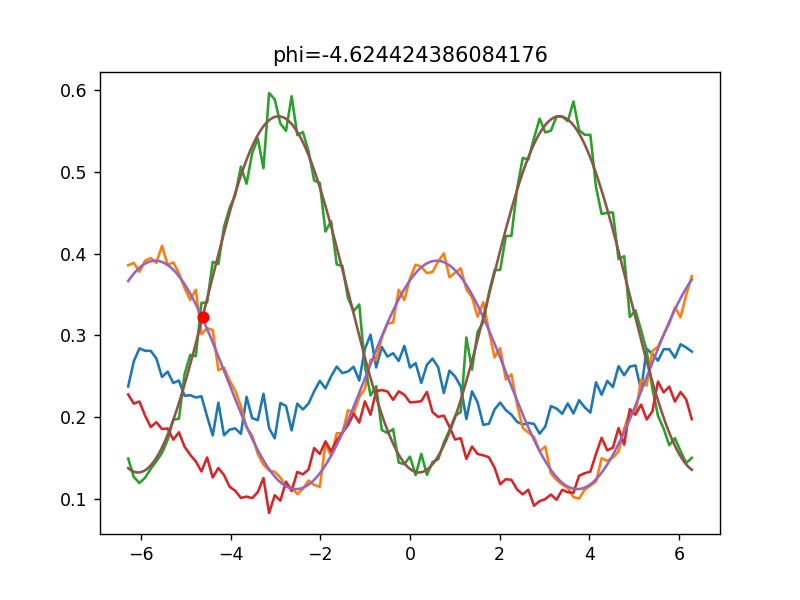

Text(0.5, 1.0, 'phi=-4.624424386084176')

In [267]:
p = pop
phi_new = np.linspace(np.min(phi),np.max(phi),1001)
res1, f1 = op.Cos_Fit(phi=np.pi/2).fitCos(phi[:,0],p[:,1])
res2, f2 = op.Cos_Fit(phi=0).fitCos(phi[:,0],p[:,2])
index = scipy.signal.argrelmin(np.abs(f1(phi_new,res1.x)-f2(phi_new,res2.x)))[0][0]
plt.figure()
plt.plot(phi[:,0],p[:,0])
plt.plot(phi[:,0],p[:,1])
plt.plot(phi[:,0],p[:,2])
plt.plot(phi[:,0],p[:,3])
plt.plot(phi_new,f1(phi_new,res1.x))
plt.plot(phi_new,f2(phi_new,res2.x))
plt.plot(phi_new[index],f2(phi_new,res2.x)[index],'ro')
plt.title(f'phi={phi_new[index]}')

# Tomography

## 单比特tomo

In [425]:
exstate=['q1']
init='Yhalf'
delay=0
q_target = measure.qubits[exstate[0]]

await psg[q_target.inst['ex_lo']].setValue('Frequency',q_target.f_ex+q_target.delta_ex)
job = Job(mrw.singletomo, (measure,exstate,init,delay), tags=exstate,auto_save=True)
t_tomo, poplist = await job.done()
await cww.OffEx(exstate,measure)
await cww.OffZ(exstate,measure)

Output()

In [282]:
t_tomo

array([['I', 'I'],
       ['Xhalf', 'Xhalf'],
       ['Ynhalf', 'Ynhalf']], dtype='<U6')

In [257]:
poplist

array([[[0.43424318, 0.56575682],
        [0.94717887, 0.05282113]],

       [[0.50310174, 0.49689826],
        [0.70228091, 0.29771909]],

       [[0.15136476, 0.84863524],
        [0.71548619, 0.28451381]]])

## 两比特tomo

In [426]:
init=['X','X']  ###初态
delay=0
# q_target = measure.qubits[exstate[0]]
tomostate = ['q1','q2']
exstate = ['q1','q2']

# await psg[q_target.inst['ex_lo']].setValue('Frequency',q_target.f_ex+q_target.delta_ex)
job = Job(mrw.multitomo,(measure,exstate,tomostate,init,delay), tags=exstate,auto_save=True)
t_tomo, poplist = await job.done()
await cww.OffEx(exstate,measure)
await cww.OffZ(exstate,measure)

Output()

In [345]:
t_tomo

array([['II', 'II'],
       ['IXhalf', 'IXhalf'],
       ['IYnhalf', 'IYnhalf'],
       ['XhalfI', 'XhalfI'],
       ['XhalfXhalf', 'XhalfXhalf'],
       ['XhalfYnhalf', 'XhalfYnhalf'],
       ['YnhalfI', 'YnhalfI'],
       ['YnhalfXhalf', 'YnhalfXhalf'],
       ['YnhalfYnhalf', 'YnhalfYnhalf']], dtype='<U12')

In [368]:
t_tomo

array([['II', 'II'],
       ['IXhalf', 'IXhalf'],
       ['IYnhalf', 'IYnhalf'],
       ['XhalfI', 'XhalfI'],
       ['XhalfXhalf', 'XhalfXhalf'],
       ['XhalfYnhalf', 'XhalfYnhalf'],
       ['YnhalfI', 'YnhalfI'],
       ['YnhalfXhalf', 'YnhalfXhalf'],
       ['YnhalfYnhalf', 'YnhalfYnhalf']], dtype='<U12')

## sqrtiswap_Tomography

In [428]:
current = np.linspace(0.001,q1.T_bias[0]*0.31,17) 
current

array([1.00000000e-03, 6.38868750e-02, 1.26773750e-01, 1.89660625e-01,
       2.52547500e-01, 3.15434375e-01, 3.78321250e-01, 4.41208125e-01,
       5.04095000e-01, 5.66981875e-01, 6.29868750e-01, 6.92755625e-01,
       7.55642500e-01, 8.18529375e-01, 8.81416250e-01, 9.44303125e-01,
       1.00719000e+00])

INFO:qulab.dht.protocol:finding neighbors of 694931976776429100391351222657914630954962137837 in local table
INFO:qulab.dht.protocol:finding neighbors of 694931976776429100391351222657914630954962137837 in local table
INFO:qulab.dht.protocol:finding neighbors of 965284137851562069902106721481028785806932498285 in local table
INFO:qulab.dht.protocol:finding neighbors of 965284137851562069902106721481028785806932498285 in local table


In [76]:
for i in ['q5','q6']:
    measure.qubits[i].gateduring = 10e-9
    measure.qubits[i].volt_zgate = 0
    measure.qubits[i].volt_zgate_b = 0
    measure.qubits[i].virtualPhase = 0
    measure.qubits[i].coordinatePhase = 0
    measure.qubits[i].during_swap = 0
    measure.qubits[i].volt_swap = 0

In [309]:
dcstate, exstate = ['q2'], ['q1']
tomostate = ['q2','q1']
mat = None

job = Job(mrw.sqrtiswapTomo, (measure,dcstate,exstate,tomostate), tags=tomostate)
pop = await job.done()
await cww.OffEx(dcstate+exstate, measure)

Output()

In [310]:
pop = np.array(pop)
p = pop[:,0:3,2:3] + pop[:,0:3,:1]
p = pop[:,0::3,2:3] + pop[:,0::3,1:2]

In [311]:
# p = qst.dealdata(np.array(pop)[:,:,:2,:])
v = qst.acquireVFromData(2, np.array(pop)[0,:,1:].flatten())
rho = qst.vToRho(v)
rho = 0.5 * (rho + rho.T.conj())
res,_,rhosimu = qst.simughzN(rho)
# fid = qst.fidelity(rho,rho_real)
# fid

<IPython.core.display.Javascript object>


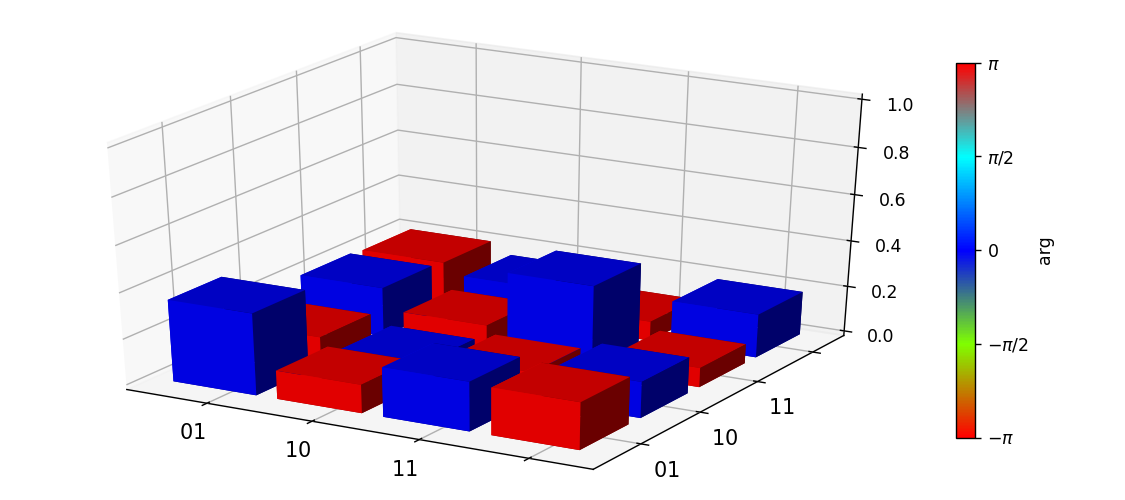

In [312]:
op_label = [["$0$", "$1$"] for i in range(2)]

# calculate the chi matrix
# chi = qpt(U_rho, op_basis)

# visualize the chi matrix
fig, ax = qt.qpt_plot_combined(np.real(rhosimu), op_label, 'iswap', figsize=(9,4))

# ax.set_title('iswap')

## 优化虚拟Z门

In [57]:
dcstate, exstate = ['q2'], ['q1']
tomostate = ['q1','q2']
mat = None
phase = np.linspace(np.pi/2,np.pi,11) 

rho_real =  np.array([[0. +0.j , 0. +0.j , 0. +0.j , 0. +0.j ],
       [0. +0.j , 0.5+0.j , 0. -0.5j, 0. +0.j ],
       [0. +0.j , 0. +0.5j, 0.5+0.j , 0. +0.j ],
       [0. +0.j , 0. +0.j , 0. +0.j , 0. +0.j ]])

job = Job(mrw.iswap_optdvirtualz, (measure,rho_real,phase,dcstate,exstate,tomostate), tags=tomostate,max=len(phase))
t, fid = await job.done()
for q in tomostate:
    for ch in measure.qubits[q].inst['ex_ch']:
        await measure.awg[measure.qubits[q].inst['ex_awg']].output_off(ch=ch)

Output()

In [58]:
pop_m = np.zeros((1000,1))

In [60]:
np.shape(pop_m[:,0])

(1000,)

## 动力学相位

In [82]:
qubit = q2
f_offset = 564e6
volt_ex, vtarget = dtl.biasshift(qubit.specfuncz,qubit.f_ex/1e9,f_offset/1e9,side='higher') 
volt_ex

-0.2932583550392607

In [94]:
measure.repeats = 500
z_len = np.linspace(0,300,51)
vphase= np.linspace(-np.pi,np.pi,31) 
calimatrix=None

# z_volt = -0.014710732491025058  ##q1
z_volt = -0.2932583550392607
exstate = ['q2']

w = 73.56364367547356e6     ##q2
# w = -24.621958839652954e6  ##q1
job = Job(mrw.Dphase,(measure,z_volt,z_len,vphase,exstate,calimatrix,w), tags=exstate,auto_save=True, max=len(z_len))
zlen_dphase, phi_dphase, s_dphase = await job.done()
await cww.OffEx(exstate,measure)
await cww.OffZ(exstate,measure)

Output()

# qwalk

In [410]:
zstate

{'q1': -0.3433846615481683, 'q2': 0}

In [423]:
exstate = ['q1','q2']
zstate = {'q1':q1.volt_swap,'q2':q2.volt_swap}
init = ['I','X']
axis=['I','I']

# exstate = ['q1']
# zstate = {'q1':q1.volt_swap*0}
# init = ['X']
# axis=['I']
# delay = np.linspace(0,100,51)
# calimatrix=None

job = Job(mrw.qwalk,(measure,exstate,zstate,init,axis,delay,calimatrix), tags=exstate,auto_save=True, max=len(delay))
t_w , p_w = await job.done()
await cww.OffEx(exstate,measure)
await cww.OffZ(exstate,measure)

Output()

In [424]:
q2.delta_ex,q1.delta_ex

(395758919.2647867, -35758919.264787674)

INFO:qulab.dht.protocol:finding neighbors of 694931976776429100391351222657914630954962137837 in local table
INFO:qulab.dht.protocol:finding neighbors of 694931976776429100391351222657914630954962137837 in local table
INFO:qulab.dht.protocol:finding neighbors of 694931976776429100391351222657914630954962137837 in local table
INFO:qulab.dht.protocol:finding neighbors of 694931976776429100391351222657914630954962137837 in local table


## Ramsey2q

In [168]:
qubit = q1
f_offset = q2.f_ex-q1.f_ex+23e6
volt_ex, vtarget = dtl.biasshift(qubit.specfuncz,qubit.f_ex/1e9,f_offset/1e9,side='higher') 
volt_ex

-0.35274684942144274

In [172]:
devz = volt_ex - q1.volt_swap
devz

-0.011456602982934994

Output()

d:\qulab\qulab\yhs\optimize.py:264: RuntimeWarning: overflow encountered in exp
  return np.sum((A * np.exp(-T2*x**2-x*T1) + B - y)**2)
C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\scipy\optimize\optimize.py:700: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
d:\qulab\qulab\yhs\optimize.py:264: RuntimeWarning: overflow encountered in square
  return np.sum((A * np.exp(-T2*x**2-x*T1) + B - y)**2)


(0.4996989765201686, 0.6831009839586202, 30000, 2887.826903658268, 0.0039603960396039604, 0)


d:\qulab\qulab\yhs\optimize.py:496: RuntimeWarning: overflow encountered in square
  return np.sum((self.func(x,para) - y)**2)
d:\qulab\qulab\yhs\optimize.py:493: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-(x/T2)**2-x/T1/2)*np.cos(2*np.pi*w*x+phi) + B


<IPython.core.display.Javascript object>


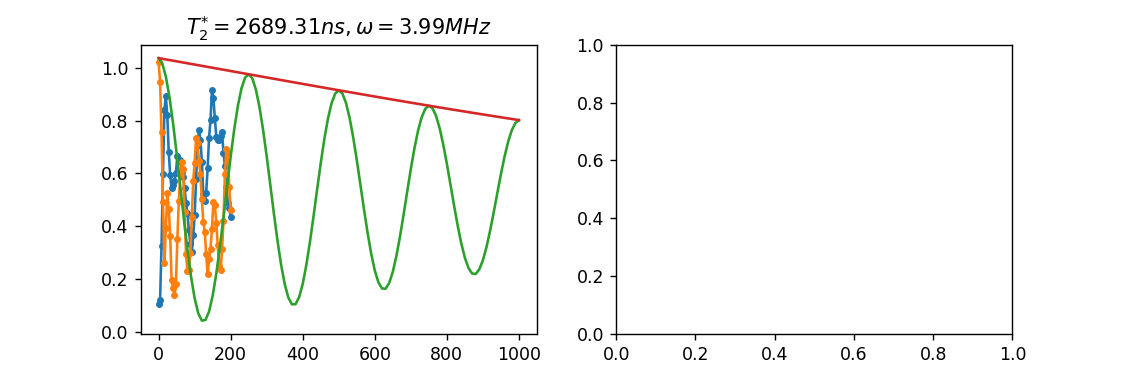

In [382]:
t_run, exstate = np.linspace(0,200,51), ['q2']
measure.qubits[exstate[0]].replace(nwave=0,seqtype='PDD',detune=4e6)
num = measure.qubitToread.index(exstate[0])
pop = True  #True 返回概率，False返回幅值
calimatrix=None
zstate={'q1':q1.volt_swap,'q2':q2.volt_swap}

job = Job(mrw.Ramsey2q,(measure,t_run,exstate,zstate,pop,calimatrix), tags=exstate, max=len(t_run))
t_ram2, s_ram2 = await job.done()
await cww.OffEx(exstate,measure)
await cww.OffZ(exstate,measure)

x, y = t_ram[:,num], np.abs(s_ram[:,num])
res, func = op.T2_Fit(T1=30000,funcname='gauss',envelopemethod='hilbert').fitT2(x,np.abs(y))
A,B,T1,T2,w,phi = res.x
z = func(x,res.x)
z_env = A*np.exp(-(x/T2)**2-x/T1/2) + B
# w,yt,amp = op.RowToRipe().fourier(x,y)
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,3))
axes[0].plot(t_ram2,np.abs(s_ram2),'-o',markersize=3)
axes[0].plot(x,z)
axes[0].plot(x,z_env)
axes[0].set_title('$T_{2}^{*}=%.2fns,\omega=%.2fMHz$'%(T2,w*1e3))
# axes[1].plot(yt[yt!=0],np.abs(amp[yt!=0]))
plt.show()

In [190]:
t_run, exstate = np.linspace(0,300,101), ['q1','q2']
q1 =  measure.qubits[exstate[0]]
q2 =  measure.qubits[exstate[1]]
q1.replace(nwave=0,seqtype='PDD',detune=4e6)
q2.replace(nwave=0,seqtype='PDD',detune=4e6)

pop = True  #True 返回概率，False返回幅值
calimatrix=None
z_off=np.linspace(-0.05,0.05,5*8)

job = Job(mrw.Ramsey2qZ, (measure,t_run,exstate,z_off,pop,calimatrix), tags=exstate,auto_save=True, max=len(z_off))
z_ram2, t_ram2, s_ram2 = await job.done()

Output()

# singleZpulse

In [206]:
t_shift = np.linspace(2700,3400,51)
exstate=['q7']
job = Job(mrs.singleZpulse,(measure,t_shift,exstate),tags=exstate,auto_save=True,max=len(t_shift))
t_sz, s_sz = await job.done()

Output()

# Zpulse

In [268]:
t_shift = np.linspace(2950,3050,101)
job = Job(mrs.zPulse,(measure,t_rabi,exstate),tags=exstate,auto_save=True,max=len(t_shift))
v_zp, t_zp, s_zp = await job.done()

Output()

TypeError: cannot unpack non-iterable NoneType object

# singleacStark

In [ ]:
t_ac = np.linspace(0,1000,201)
job = Job(mrs.singleacStark(measure,t_ac,power=1,exstate=['q6']),tags=exstate,auto_save=True,max=len(t_ac))
t_sac, s_sac = await job.done()

In [ ]:
job = Job(mrs.acStark(measure,t_ac,power=1,exstate=['q6']),tags=exstate,auto_save=True,max=len(t_ac))
f_ac, t_sac, s_sac = await job.done()